# STEP 1: Import The Following Relevant Scientific and Computational Libraries for Data Manipulation, Modelling, Interpretation, Visualization ETC.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Lambda, Input, Dense, Embedding, multiply, Flatten, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# STEP 2A: DATA EXPLORATORY

In [2]:
# Assuming your DataFrame is named lowerBackPains_df
# print(cardio_df.describe())

# Load your dataset
# lowerBackPains_df = pd.read_csv('path_to_your_dataset.csv')

# Plotting histograms for each feature
# cardio_df.hist(bins=15, figsize=(15, 10))
# plt.show()

# Count plot for the target variable
# sns.countplot(x='cardio', data=cardio_df)
# plt.title('Distribution of Target Variable')
# plt.show()

# Heatmap of correlations
# plt.figure(figsize=(12, 8))
# sns.heatmap(cardio_df.corr(), annot=True, fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()

# Pairplot to visualize relationships between features
# Note: This can be resource-intensive for large datasets
# sns.pairplot(cardio_df, hue='cardio')
# plt.show()



In [3]:
# Assuming you have loaded your dataset into a DataFrame named lowerBackPains_df
# lowerBackPains_df = pd.read_csv('path_to_your_dataset.csv')

# Separate the features and the target variable
# X = lowerBackPains_df.drop('cardio', axis=1)
# y = lowerBackPains_df['cardio']

# It's a good practice to scale your features, especially when using algorithms that are distance-based
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply SMOTE only to training data to avoid information leakage into the test set
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
# print("Class distribution after SMOTE:")
# print(pd.Series(y_train_smote).value_counts())


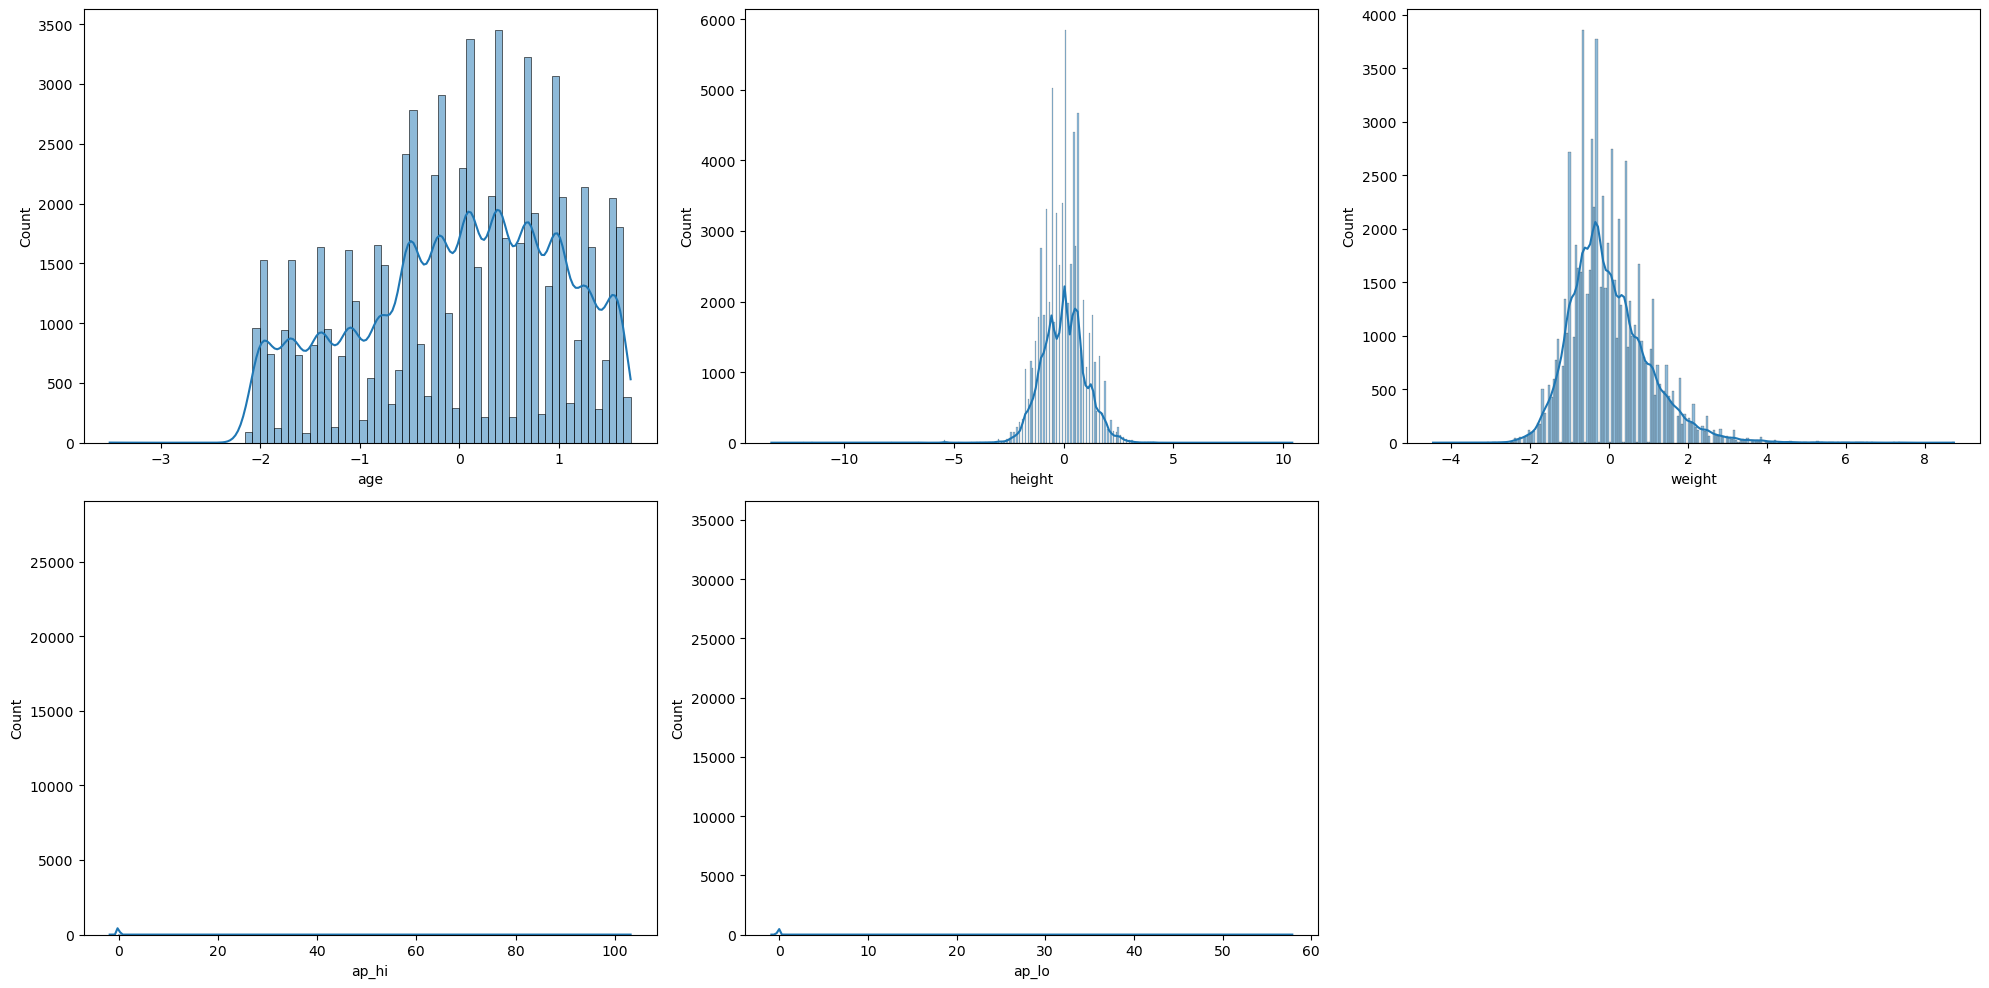

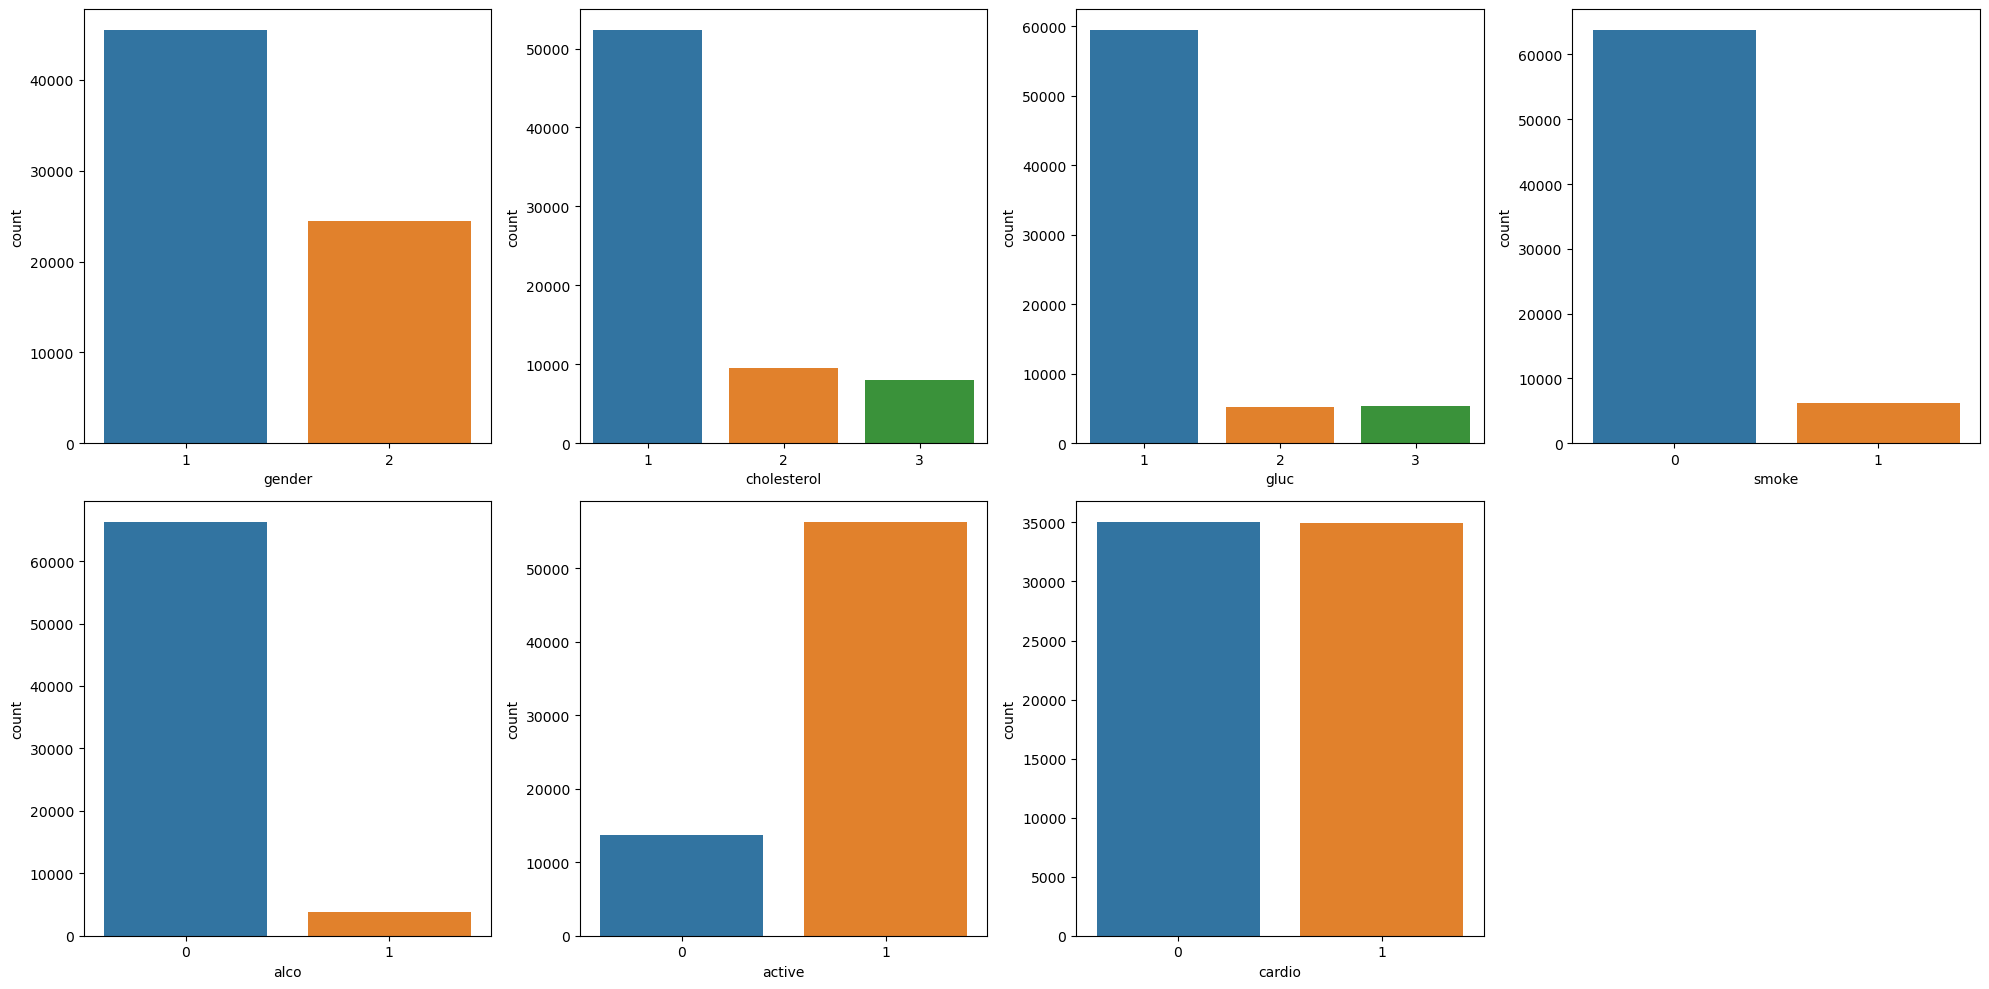

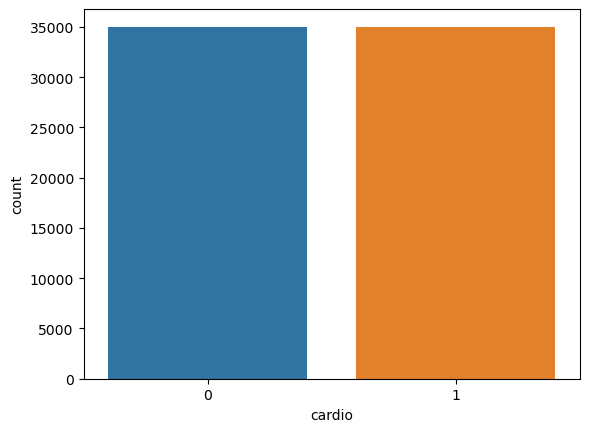

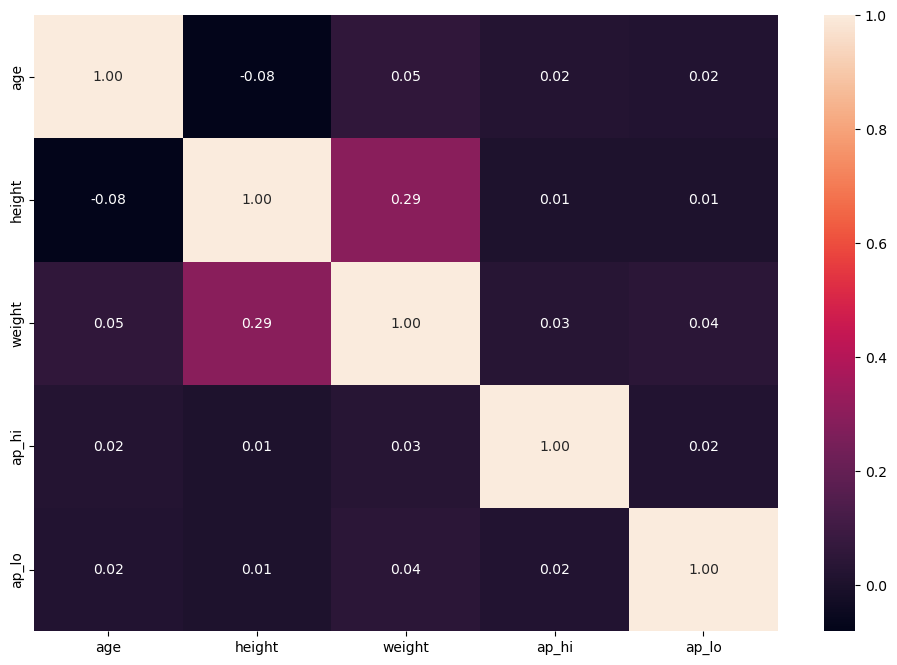

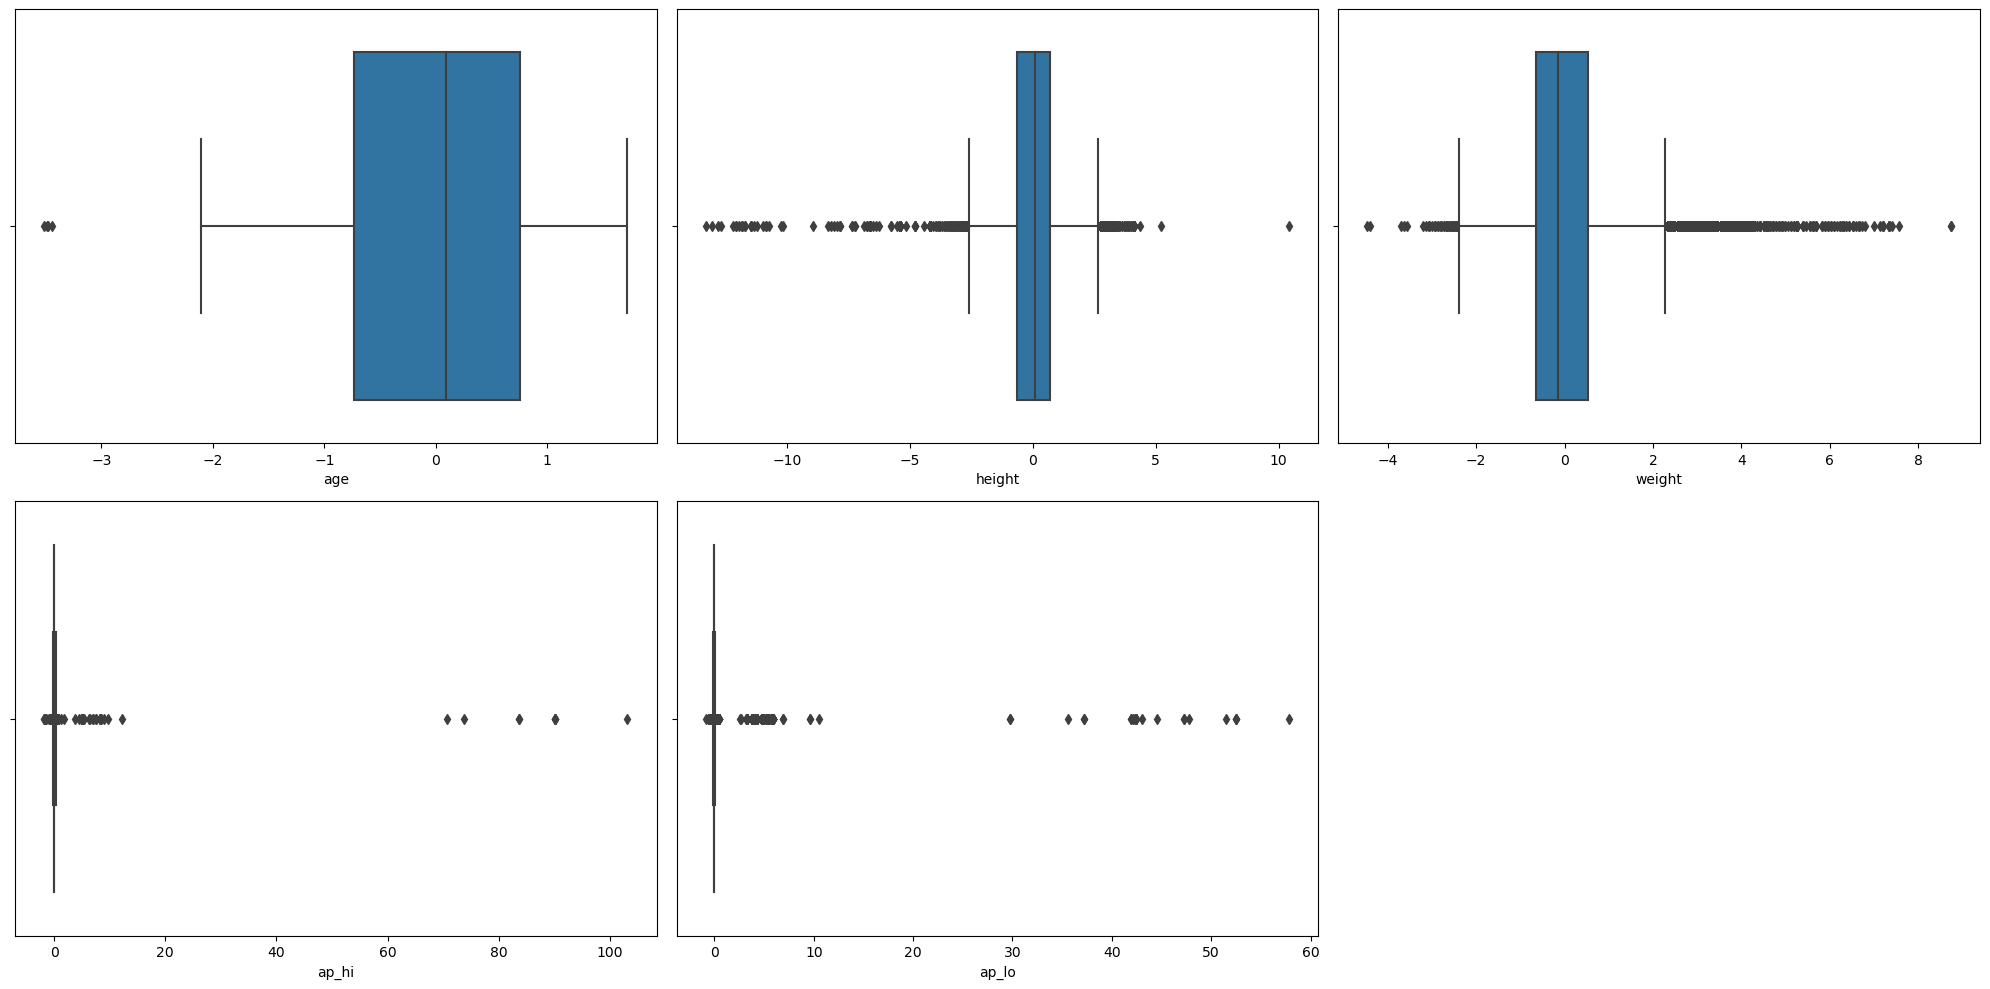

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cardio_df = pd.read_csv('C:\\Users\\Ede\\Desktop\\Synthetic_Real_Data_Using_AE_VAE_Techniques\\master_thesis2024\\cardio.csv')
# lowerBackPains_Data_Path = 'C:\\Users\\Ede\\Desktop\\Synthetic_Real_Data_Using_AE_VAE_Techniques\\cardio.csv'
# Data Preprocessing

## Convert age from days to years
cardio_df['age'] = cardio_df['age'] / 365

## Convert certain features to categorical types if necessary
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
cardio_df[categorical_cols] = cardio_df[categorical_cols].astype('category')

## Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
cardio_df[scaled_cols] = scaler.fit_transform(cardio_df[scaled_cols])

# Exploratory Data Analysis

## Distribution of each feature
plt.figure(figsize=(20, 10))
for i, col in enumerate(scaled_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(cardio_df[col], kde=True)
plt.tight_layout()
plt.show()

## Distribution of categorical features
plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=col, data=cardio_df)
plt.tight_layout()
plt.show()

## Target variable analysis
sns.countplot(x='cardio', data=cardio_df)
plt.show()

## Correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(cardio_df.corr(), annot=True, fmt=".2f")
plt.show()

## Outliers identification
plt.figure(figsize=(20, 10))
for i, col in enumerate(scaled_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=cardio_df[col])
plt.tight_layout()
plt.show()


Statistical Summary for ap_hi and ap_lo:
              ap_hi         ap_lo
count  7.000000e+04  7.000000e+04
mean  -1.518658e-15 -7.473280e-16
std    1.000007e+00  1.000007e+00
min   -1.810381e+00 -8.841161e-01
25%   -5.725127e-02 -8.823850e-02
50%   -5.725127e-02 -8.823850e-02
75%    7.261016e-02 -3.517999e-02
max    1.031826e+02  5.785165e+01
Unique values in ap_hi: [-1.22181980e-01  7.26101623e-02  7.67944830e-03  1.37540876e-01
 -1.87112694e-01 -5.72512657e-02  1.05075519e-01  2.67402304e-01
  4.01448053e-02 -2.47859087e-02 -2.52043408e-01  3.32333018e-01
  2.02471590e-01  2.71586625e-02  3.97263732e-01 -3.16974122e-01
 -4.42651229e-02  2.60909233e-01 -1.82928373e-02  1.89485448e-01
  4.62194446e-01 -7.45516834e-01 -3.77720515e-02 -3.81904836e-01
  2.08964662e-01  1.18061662e-01 -8.97166227e-02  5.31309481e-02
  1.57020091e-01 -7.64996048e-01  1.24554734e-01 -1.54647337e-01
  5.92055874e-01 -6.37443371e-02  7.91032337e-02  2.34936947e-01
  2.28443876e-01 -7.58502977e-01 -3.12789801

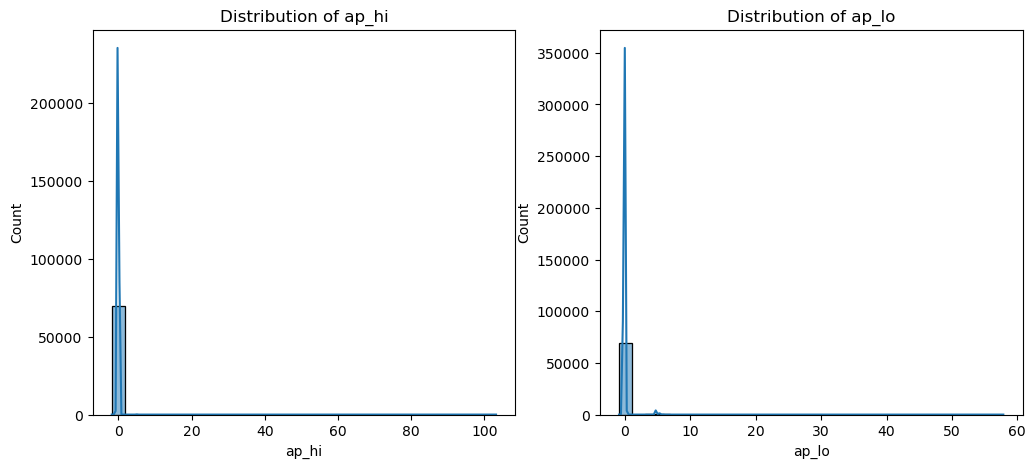

C:\Users\Ede\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


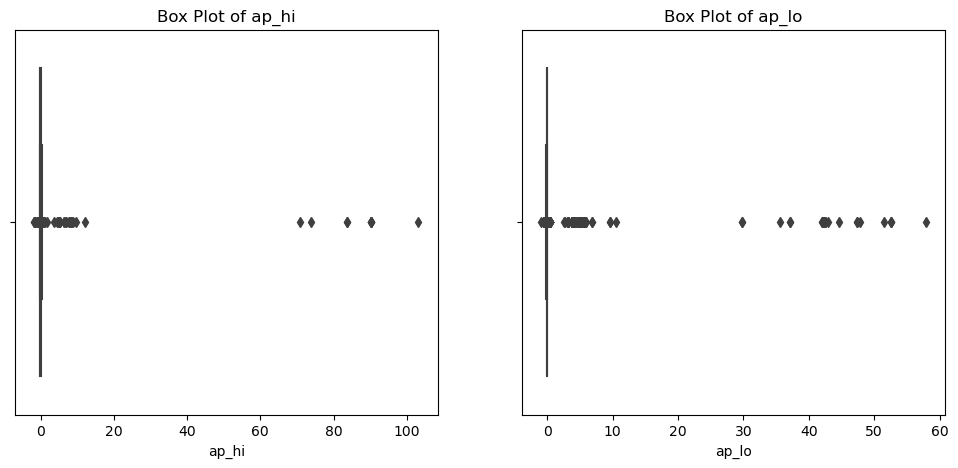

Value counts for ap_hi:
-0.057251    27699
 0.072610     9506
 0.007679     8961
-0.122182     8644
 0.137541     4450
 0.202472     3036
-0.187113     2581
-0.252043      982
 0.267402      717
 0.332333      695
Name: ap_hi, dtype: int64

Value counts for ap_lo:
-0.088238    34847
-0.035180    14316
-0.141297    10245
 0.017879     4082
-0.194356     2727
 4.793144      666
 0.070937      401
-0.093544      357
-0.061709      290
-0.114768      211
Name: ap_lo, dtype: int64


In [3]:
# Step 1: Basic Statistical Summary
# First, let's look at the basic statistical summary of these features to understand their range, mean, standard deviation, etc.
print("Statistical Summary for ap_hi and ap_lo:")
print(cardio_df[['ap_hi', 'ap_lo']].describe())

# Step 2: Checking for Unique Values
# It's helpful to see the unique values these features hold. This can give us insights into any potential erroneous data entries.
print("Unique values in ap_hi:", cardio_df['ap_hi'].unique())
print("Unique values in ap_lo:", cardio_df['ap_lo'].unique())

# Step 3: Visualizing Distribution
# Visualizing the distribution of these features can help us understand their spread and detect any anomalies.
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms for ap_hi and ap_lo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(cardio_df['ap_hi'], kde=True, bins=30)
plt.title('Distribution of ap_hi')

plt.subplot(1, 2, 2)
sns.histplot(cardio_df['ap_lo'], kde=True, bins=30)
plt.title('Distribution of ap_lo')
plt.show()

# Step 4: Identifying Outliers
# Box plots can be effective in visualizing outliers.

# Box plots for ap_hi and ap_lo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(cardio_df['ap_hi'])
plt.title('Box Plot of ap_hi')

plt.subplot(1, 2, 2)
sns.boxplot(cardio_df['ap_lo'])
plt.title('Box Plot of ap_lo')
plt.show()

# Step 5: Checking Value Counts
# Understanding the frequency of different values can reveal any data entry issues.
print("Value counts for ap_hi:")
print(cardio_df['ap_hi'].value_counts().head(10)) # Displaying top 10 most frequent values

print("\nValue counts for ap_lo:")
print(cardio_df['ap_lo'].value_counts().head(10)) # Displaying top 10 most frequent values

# These steps will provide a comprehensive overview of the ap_hi and ap_lo features,
# allowing us to decide if any data cleaning, transformation, or scaling is necessary.
# Keep in mind that the range of normal blood pressure values is well established in medical literature,
# and any significant deviation might indicate data quality issues.

Extreme values in ap_hi: []
Extreme values in ap_lo: []


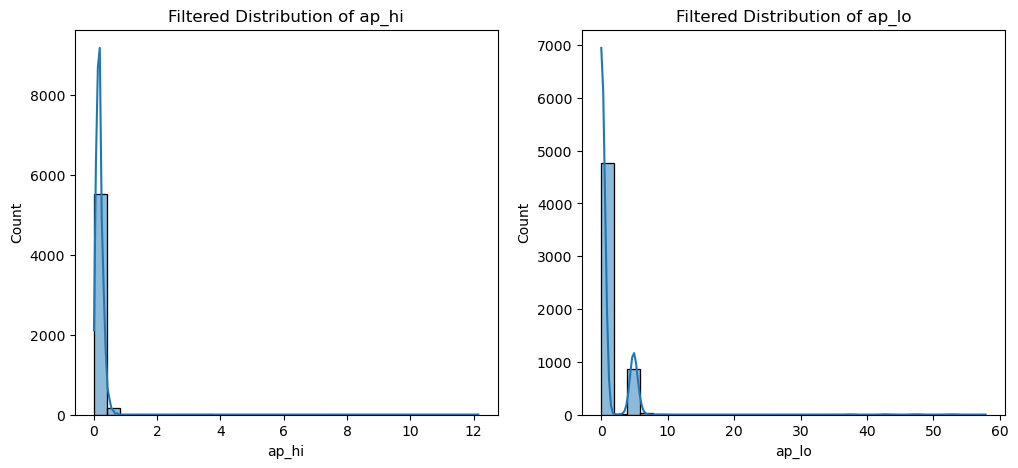

C:\Users\Ede\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


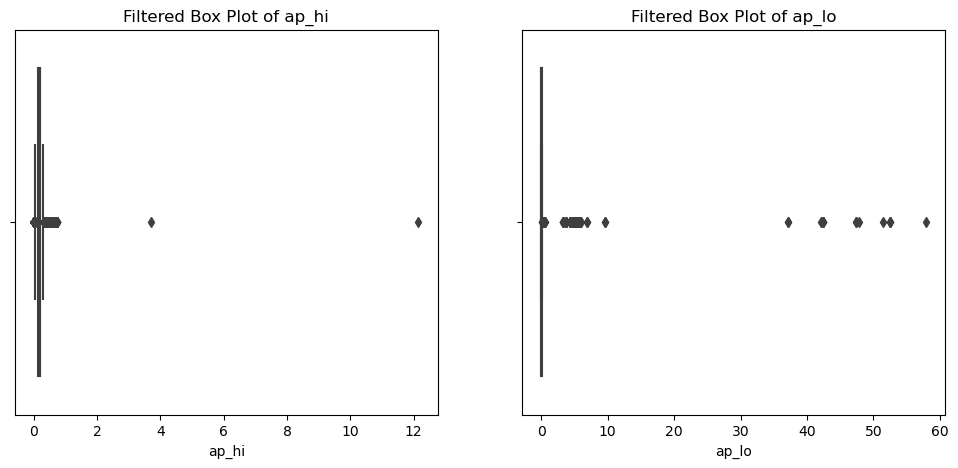

Statistical Summary for Filtered ap_hi and ap_lo:
             ap_hi        ap_lo
count  5681.000000  5681.000000
mean      0.184894     0.928102
std       0.196201     2.964357
min       0.007679     0.001961
25%       0.137541     0.017879
50%       0.202472     0.017879
75%       0.202472     0.070937
max      12.149723    57.851653


In [4]:
# Step 1: Identifying Extreme Values
# First, identify extreme values that are biologically implausible for blood pressure readings.
print("Extreme values in ap_hi:", cardio_df[cardio_df['ap_hi'] > 200]['ap_hi'].unique())
print("Extreme values in ap_lo:", cardio_df[cardio_df['ap_lo'] > 200]['ap_lo'].unique())

# Step 2: Filtering the Data
# Consider removing values that are physiologically impossible (e.g., systolic blood pressure above 200 mmHg or diastolic blood pressure above 120 mmHg).
filtered_df = cardio_df[(cardio_df['ap_hi'] > 0) & (cardio_df['ap_hi'] <= 200) & 
                        (cardio_df['ap_lo'] > 0) & (cardio_df['ap_lo'] <= 120)]

# Step 3: Re-evaluating the Distribution
# After filtering, re-examine the distribution of these features.
# Plotting histograms for ap_hi and ap_lo after filtering
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(filtered_df['ap_hi'], kde=True, bins=30)
plt.title('Filtered Distribution of ap_hi')

plt.subplot(1, 2, 2)
sns.histplot(filtered_df['ap_lo'], kde=True, bins=30)
plt.title('Filtered Distribution of ap_lo')
plt.show()

# Step 4: Re-visualizing Outliers
# Check the box plots again after filtering to see if the distribution appears more normal.
# Box plots for ap_hi and ap_lo after filtering
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(filtered_df['ap_hi'])
plt.title('Filtered Box Plot of ap_hi')

plt.subplot(1, 2, 2)
sns.boxplot(filtered_df['ap_lo'])
plt.title('Filtered Box Plot of ap_lo')
plt.show()

# Step 5: Re-assessing the Statistical Summary
# Finally, look at the statistical summary of the filtered data.
print("Statistical Summary for Filtered ap_hi and ap_lo:")
print(filtered_df[['ap_hi', 'ap_lo']].describe())

# These steps should help in understanding the distribution of ap_hi and ap_lo better and ensuring that the values are within a reasonable range for blood pressure readings.
# It's crucial in data preprocessing to ensure that the data you're working with is accurate and reflective of real-world measurements, especially in healthcare-related datasets.
#
#

Extreme values in ap_hi: [  5.02033057   5.04630285   5.06578207  73.83390127   8.38374155
   3.71522322   8.90318727   5.05279593  90.19644119   8.25388013
   9.68235583   6.50075085 103.18258399   6.96825199   4.39699571
   7.60457299   8.31231777  70.71722699   5.39692871  83.63843908
   6.37088942   6.9877312   12.14972297]
Extreme values in ap_lo: [ 5.32372941  4.79314432  3.73197414  4.9682374   4.79845017  5.8543145
 52.54580235 42.167558    5.02660176 47.77053654  4.27317093  4.83559113
 10.56591009  3.74258585 41.93410056  4.90987304  3.99726669  3.24383586
 47.29831582  4.85150868  4.83028528  5.73227993 37.15883476  3.24914171
 44.58702601  5.37678792 42.4593798   5.2600592   5.20169484  5.42984643
  5.45637568 42.46468565  3.25444756 29.73064351 42.35326278  5.38209377
  4.80906187  9.56841012  3.7797268   3.73727999  4.80375602  3.78503265
 37.15352891 57.85165324 51.48463217 42.99527074  5.5306576   3.83809116
  6.91548468  4.26255923 35.56707949  3.20138905  5.32903526  

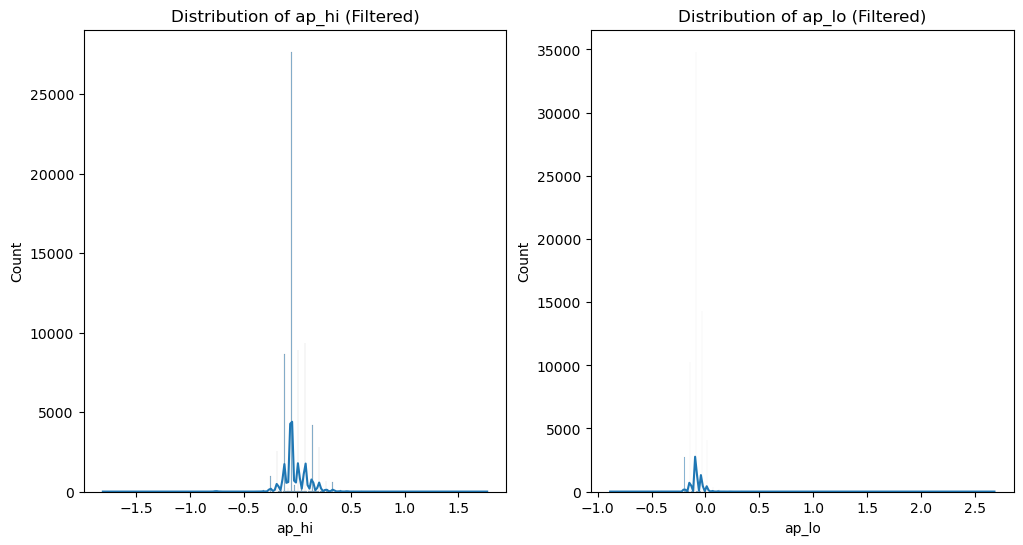

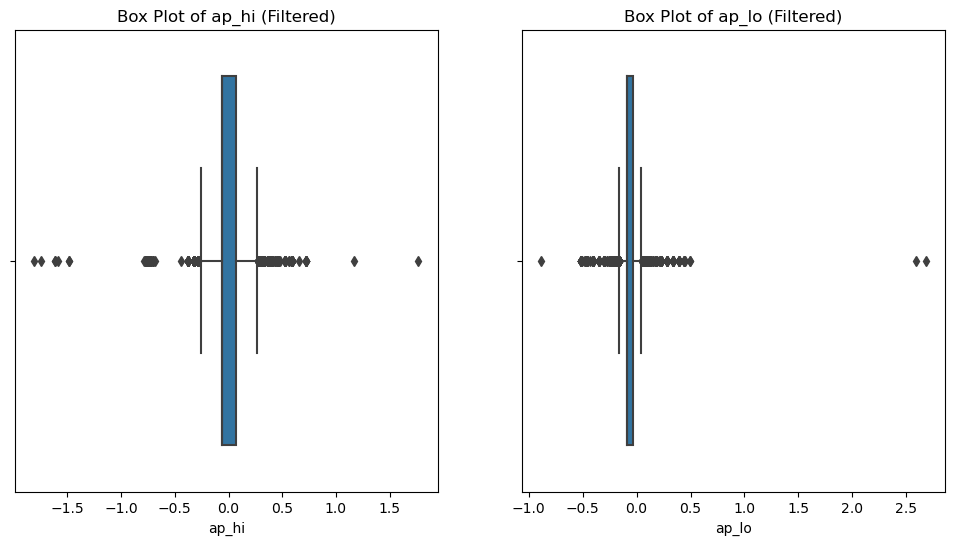

Statistical Summary for Filtered ap_hi and ap_lo:
              ap_hi         ap_lo
count  69011.000000  69011.000000
mean      -0.016340     -0.081101
std        0.116459      0.054497
min       -1.810381     -0.884116
25%       -0.057251     -0.088238
50%       -0.057251     -0.088238
75%        0.072610     -0.035180
max        1.767302      2.681416


In [5]:
# Step 3: Investigate Extreme Values
# Examine the extreme values more closely to understand their impact on the data. 
# Look for values that are several standard deviations away from the mean.
# Identifying extreme values in ap_hi and ap_lo
extreme_values_ap_hi = cardio_df[cardio_df['ap_hi'] > 3]['ap_hi']
extreme_values_ap_lo = cardio_df[cardio_df['ap_lo'] > 3]['ap_lo']

print("Extreme values in ap_hi:", extreme_values_ap_hi.unique())
print("Extreme values in ap_lo:", extreme_values_ap_lo.unique())


# Step 4: Visualizing Distributions with Extreme Values Removed
# If the extreme values are not biologically plausible, 
# consider removing them and re-plotting the distributions.
# Filter out extreme values
filtered_cardio_df = cardio_df[(cardio_df['ap_hi'] <= 3) & (cardio_df['ap_lo'] <= 3)]

# Re-plot histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(filtered_cardio_df['ap_hi'], kde=True)
plt.title('Distribution of ap_hi (Filtered)')

plt.subplot(1, 2, 2)
sns.histplot(filtered_cardio_df['ap_lo'], kde=True)
plt.title('Distribution of ap_lo (Filtered)')
plt.show()

# Step 5: Box Plot Analysis (Post-filtering)
# After filtering, re-examine the box plots to check for outliers.
# Box plots after filtering
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=filtered_cardio_df['ap_hi'])
plt.title('Box Plot of ap_hi (Filtered)')

plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_cardio_df['ap_lo'])
plt.title('Box Plot of ap_lo (Filtered)')
plt.show()

# Step 6: Reassess Statistical Summary
# Finally, reassess the statistical summary of these features after the adjustments.
print("Statistical Summary for Filtered ap_hi and ap_lo:")
print(filtered_cardio_df[['ap_hi', 'ap_lo']].describe())

# These steps should provide a clearer understanding of the ap_hi and ap_lo features, ensuring that their distributions are more representative of typical blood pressure readings.
# This analysis is crucial, especially in a healthcare context, where accurate and realistic data are vital for meaningful insights.
#

# RE-DATA VISUALIZING AFTER REMOVING OUTLIERS

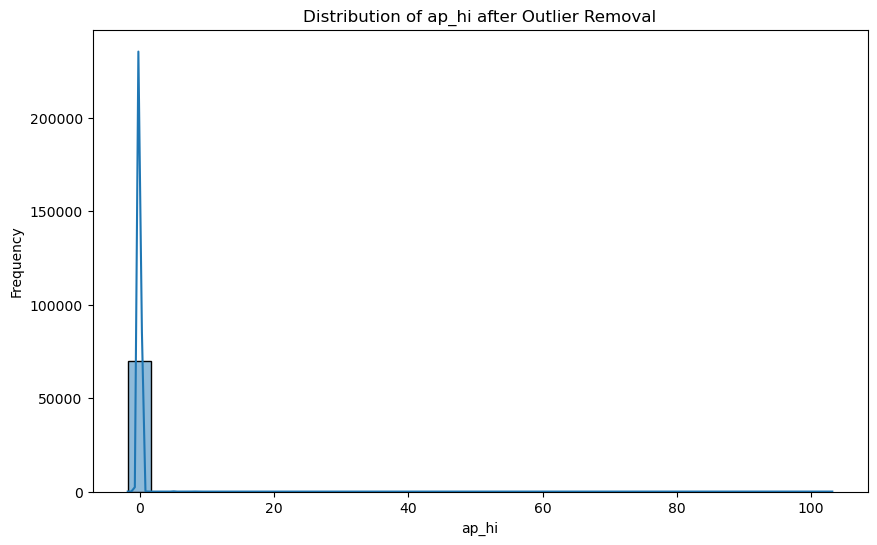

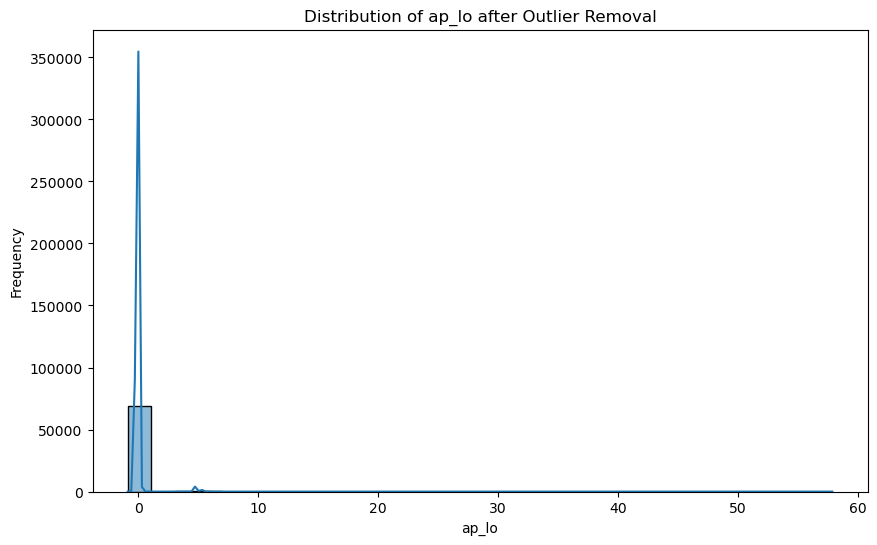

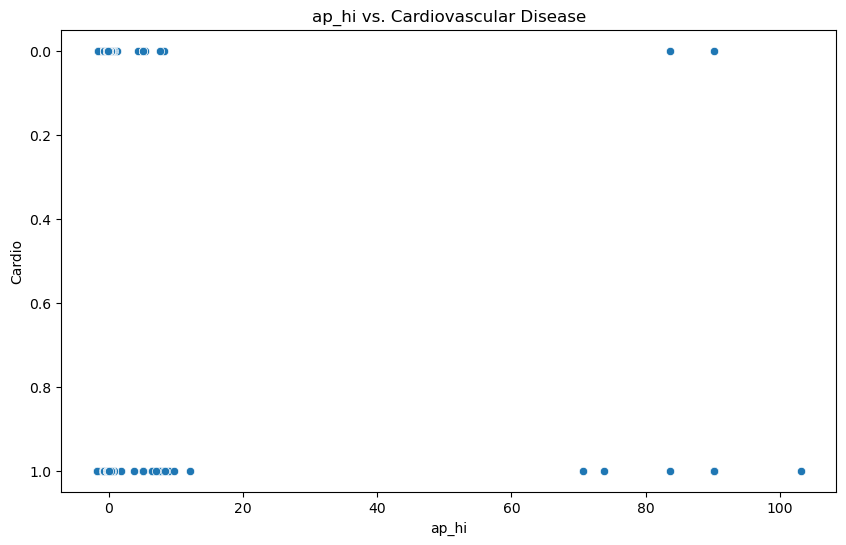

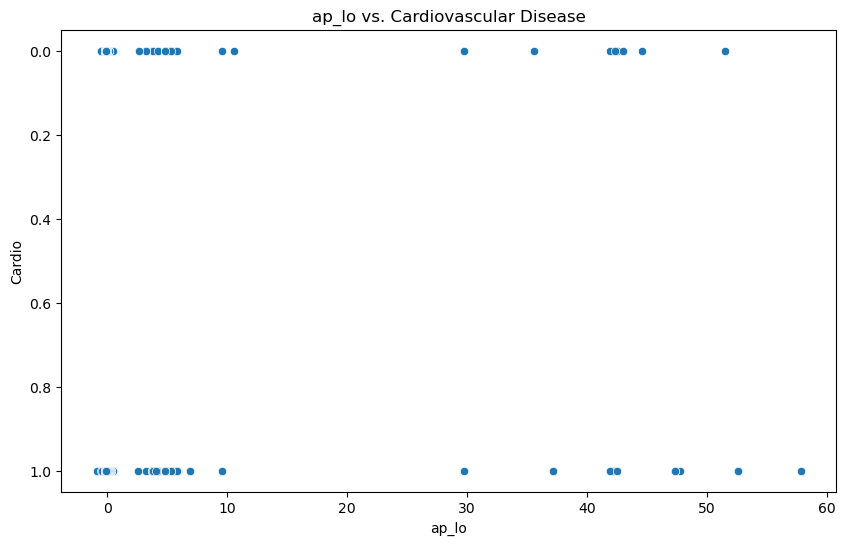

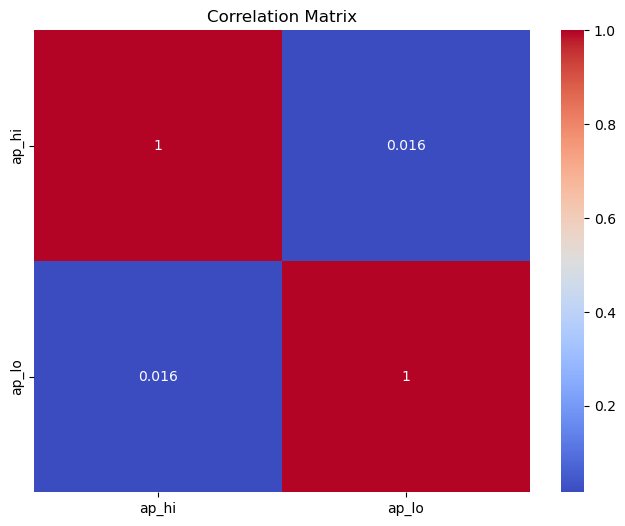

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cardio_df is your DataFrame after outlier removal

# 1. Data Visualization

# Histogram for ap_hi
plt.figure(figsize=(10, 6))
sns.histplot(cardio_df['ap_hi'], bins=30, kde=True)
plt.title('Distribution of ap_hi after Outlier Removal')
plt.xlabel('ap_hi')
plt.ylabel('Frequency')
plt.show()

# Histogram for ap_lo
plt.figure(figsize=(10, 6))
sns.histplot(cardio_df['ap_lo'], bins=30, kde=True)
plt.title('Distribution of ap_lo after Outlier Removal')
plt.xlabel('ap_lo')
plt.ylabel('Frequency')
plt.show()

# 2. Relationship Analysis

# Scatter plot for ap_hi vs. cardio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ap_hi', y='cardio', data=cardio_df)
plt.title('ap_hi vs. Cardiovascular Disease')
plt.xlabel('ap_hi')
plt.ylabel('Cardio')
plt.show()

# Scatter plot for ap_lo vs. cardio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ap_lo', y='cardio', data=cardio_df)
plt.title('ap_lo vs. Cardiovascular Disease')
plt.xlabel('ap_lo')
plt.ylabel('Cardio')
plt.show()

# Correlation analysis
correlation_matrix = cardio_df[['ap_hi', 'ap_lo', 'cardio']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# STEP 2B: DATA  PREPARATION AND PREPROCESSING

In [9]:
# Data Normalization
# from sklearn.preprocessing import StandardScaler

# Columns to normalize
# columns_to_normalize = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Standard Scaler for normalization
# scaler = StandardScaler()

# Apply normalization on the dataset
# cardio_df[columns_to_normalize] = scaler.fit_transform(cardio_df[columns_to_normalize])

#  Splitting the Dataset
# We'll split the dataset into a training set and a testing set.
# from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X_train2, X_test2 = train_test_split(cardio_df, test_size=0.2, random_state=42)

# Confirm the shape of X_train and X_test
# print("Shape of X_train2:", X_train2.shape)  # Should be (samples, 12)
# print("Shape of X_test2:", X_test2.shape)  # Should be (samples, 12)

In [7]:
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-0.436062,2,0.443452,-0.847873,-0.122182,-0.088238,1,1,0,0,1,0
1,0.307686,1,-1.018168,0.749831,0.072610,-0.035180,3,1,0,0,1,1
2,-0.247997,1,0.078047,-0.708942,0.007679,-0.141297,3,1,0,0,0,1
3,-0.748152,2,0.565254,0.541435,0.137541,0.017879,1,1,0,0,1,1
4,-0.808543,1,-1.018168,-1.264666,-0.187113,-0.194356,1,1,0,0,0,0


In [8]:
cardio_df.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,-0.092762,2,0.443452,0.124642,-0.057251,-0.088238,1,1,1,0,1,0
69996,1.269492,1,-0.774565,3.597913,0.072610,-0.035180,2,2,0,0,1,1
69997,-0.163286,2,2.270477,2.139139,0.332333,-0.035180,3,1,0,1,0,1
69998,1.200589,1,-0.165556,-0.153219,0.040145,-0.088238,1,2,0,0,0,1
69999,0.434144,1,0.687055,-0.153219,-0.057251,-0.088238,2,1,0,0,1,0


In [9]:
# Check for missing values
cardio_df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [13]:
# Assuming 'Class_att' is your target column with binary classes 0 and 1
class_counts = cardio_df['cardio'].value_counts()
total_counts = len(cardio_df)

# Calculate class percentages
class_percentages = (class_counts / total_counts) * 100

# Print class percentages
print("Class Percentages:")
print(class_percentages)

# Check if the data is imbalanced
if abs(class_percentages[0] - class_percentages[1]) > 20:  # You can adjust this threshold
    print("\nThe dataset is imbalanced.")
else:
    print("\nThe dataset is balanced.")

Class Percentages:
0    50.03
1    49.97
Name: cardio, dtype: float64

The dataset is balanced.


In [58]:
print('==============100% of Cardiovascular Disease (Original Dataset)===========')
cardio_df.info()

==============100% of Cardiovascular Disease (Original Dataset)===========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          70000 non-null  float64 
 1   gender       70000 non-null  category
 2   height       70000 non-null  float64 
 3   weight       70000 non-null  float64 
 4   ap_hi        70000 non-null  float64 
 5   ap_lo        70000 non-null  float64 
 6   cholesterol  70000 non-null  category
 7   gluc         70000 non-null  category
 8   smoke        70000 non-null  category
 9   alco         70000 non-null  category
 10  active       70000 non-null  category
 11  cardio       70000 non-null  category
dtypes: category(7), float64(5)
memory usage: 3.1 MB


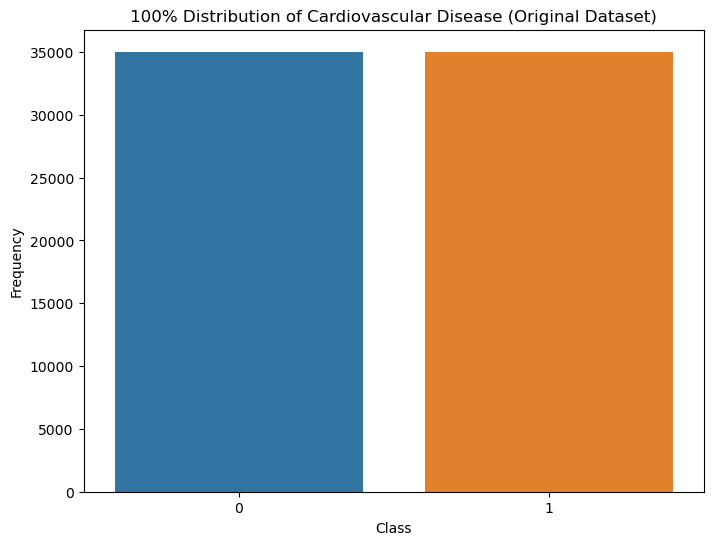

In [68]:
# Assuming 'Class_att' is your target column
class_counts = cardio_df['cardio'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('100% Distribution of Cardiovascular Disease (Original Dataset)')
plt.show()

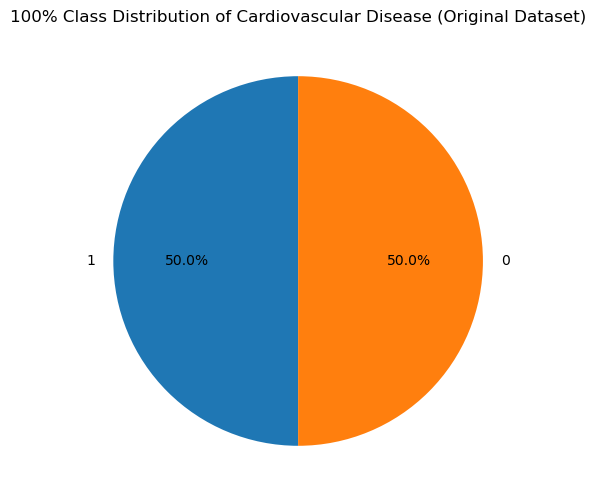

In [67]:
import matplotlib.pyplot as plt

# Assuming 'cardio' is your target column and we have these counts
class_counts = {"1": 35000, "0": 35000}

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=90)
plt.title('100% Class Distribution of Cardiovascular Disease (Original Dataset)')
plt.show()


# Preamble

Prior to synthetic data generation, data preprocessing steps were meticulously applied to each dataset, ensuring data cleanliness, normalization, and partitioning into the said two main component data. The original dataset, comprising 80% of the total data, served as the foundation for generating synthetic data. In contrast, the remaining 20%, referred to as control data, was reserved for evaluating both the privacy risks associated with the synthetic dataset and the utility as well.

# Ensuring Privacy Preservation and Data Utility
1. Privacy Preservation: By using an autoencoder to generate synthetic data, we minimize the risk of exposing original data entries. The classifier's role is solely to provide labels for synthetic instances, further abstracting the process from direct data duplication.

2. Data Utility: The utility of the synthetic data is maintained through the autoencoder's ability to capture and replicate the complex relationships in the original data. The trained classifier ensures that synthetic data receives labels that are consistent with the learned patterns, making the synthetic dataset useful for downstream tasks.


# Purpose of the Control Dataset
1. Benchmarking Privacy Leakage: The control dataset (control_data_df) is used to differentiate what an attacker learns purely from the synthetic dataset's utility versus what constitutes an actual privacy leak. By comparing the success of attacks on the control dataset against those on the original dataset, one can more accurately assess the extent of privacy risk.

2. Ensuring Fair Evaluation: It ensures that the assessment accounts for the possibility that the synthetic dataset might inadvertently reveal specific patterns or information that could lead to re-identification or information inference not due to the inherent utility of the synthetic data but due to direct data leakage.

# Creating a Control Dataset
The control dataset should consist of records that are not included in the synthetic dataset's generation process. Here's how to create or obtain a control dataset:

1. Splitting Original Data: Before generating your synthetic dataset, split your original dataset into two parts. One part is used to generate the synthetic dataset (original_data_df), and the other part serves as the control dataset (control_data_df). This way, the control dataset contains real data points that were not used to train the model creating the synthetic data, ensuring they share similar distributions without direct overlaps.



# Anonymeter Tool
Anonymeter’s development as an open-source tool underlines Anonos’s commitment to enhancing privacy technologies’ accessibility. It is crafted to be adaptable, ensuring it remains relevant amid evolving privacy regulations and research advancements. The Anonymeter framework plays a pivotal role in the field of synthetic data by providing a structured approach to evaluate and mitigate privacy risks. By assessing singling-out, linkability, and inference risks, Anonymeter helps researchers and practitioners balance the trade-offs between maintaining data utility and ensuring privacy. This is particularly relevant in the era of big data and machine learning, where the use of synthetic data is becoming increasingly prevalent. For more information on this tool, including its installation and configurations, do visit their website and github via the links below.

https://www.anonos.com/blog/presenting-anonymeter-the-tool-for-assessing-privacy-risks-in-synthetic-datasets

https://github.com/statice/anonymeter


# Partioning the Original Data into 80% and 20% respectiively as shown below

In [8]:
cardiovascular_train_dataframe, control_cardio_dataframe = train_test_split(cardio_df, test_size=0.2, random_state=42)

In [11]:
cardiovascular_train_dataframe.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
47339,0.975641,1,-1.261771,0.402504,0.007679,-0.035180,2,1,0,0,1,1
67456,-1.115365,2,-0.287358,-0.292150,0.072610,-0.035180,1,1,0,0,0,1
12308,0.672467,2,1.174262,1.236089,0.137541,0.017879,1,1,0,0,1,1
32557,1.579556,2,1.052460,0.124642,-0.057251,-0.077627,1,1,0,0,1,1
664,0.329168,1,-0.530961,-0.986804,-0.057251,-0.088238,1,1,0,0,1,0


In [12]:
cardiovascular_train_dataframe.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
37194,-1.405568,2,0.687055,0.055177,0.137541,-0.088238,1,1,1,0,1,1
6265,1.515922,2,-0.287358,-0.083754,0.202472,-0.035180,1,1,0,0,1,1
54886,1.669941,1,0.565254,-0.014288,-0.057251,-0.088238,1,1,0,0,1,0
860,-0.503343,1,0.321650,-0.292150,-0.057251,-0.088238,1,1,0,0,0,0
15795,-1.765080,2,1.539667,-0.708942,-0.057251,-0.088238,1,1,0,0,1,0


In [13]:
control_cardio_dataframe.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
46730,0.932678,1,-1.018168,-0.708942,0.072610,-0.088238,2,1,0,0,1,1
48393,0.975641,1,0.687055,0.749831,0.202472,-0.035180,1,1,0,0,1,1
41416,1.540646,1,-1.627176,1.097158,0.007679,-0.088238,1,1,0,0,1,1
34506,0.110299,1,-0.652763,1.583416,-0.057251,-0.088238,1,1,0,0,1,1
43725,-0.435251,1,-0.043755,-0.431081,-0.057251,-0.088238,1,1,0,0,1,0


In [14]:
# Assuming 'Class_att' is your target column with binary classes 0 and 1
class_counts = cardiovascular_train_dataframe['cardio'].value_counts()
total_counts = len(cardiovascular_train_dataframe)
print(total_counts) 

56000


In [15]:
# Verify encoding
cardiovascular_train_dataframe['cardio'].head()

47339    1
67456    1
12308    1
32557    1
664      0
Name: cardio, dtype: category
Categories (2, int64): [0, 1]

In [16]:
cardiovascular_train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56000 entries, 47339 to 15795
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          56000 non-null  float64 
 1   gender       56000 non-null  category
 2   height       56000 non-null  float64 
 3   weight       56000 non-null  float64 
 4   ap_hi        56000 non-null  float64 
 5   ap_lo        56000 non-null  float64 
 6   cholesterol  56000 non-null  category
 7   gluc         56000 non-null  category
 8   smoke        56000 non-null  category
 9   alco         56000 non-null  category
 10  active       56000 non-null  category
 11  cardio       56000 non-null  category
dtypes: category(7), float64(5)
memory usage: 2.9 MB


In [17]:
control_cardio_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 46730 to 63452
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          14000 non-null  float64 
 1   gender       14000 non-null  category
 2   height       14000 non-null  float64 
 3   weight       14000 non-null  float64 
 4   ap_hi        14000 non-null  float64 
 5   ap_lo        14000 non-null  float64 
 6   cholesterol  14000 non-null  category
 7   gluc         14000 non-null  category
 8   smoke        14000 non-null  category
 9   alco         14000 non-null  category
 10  active       14000 non-null  category
 11  cardio       14000 non-null  category
dtypes: category(7), float64(5)
memory usage: 752.8 KB


In [18]:
# Verify encoding
control_cardio_dataframe['cardio'].head()

46730    1
48393    1
41416    1
34506    1
43725    0
Name: cardio, dtype: category
Categories (2, int64): [0, 1]

# SAVING THE PARTITIONED DATASETS TO CSV FOR FUTURE USE

In [9]:
control_cardio_dataframe.to_csv(r'C:\Users\Ede\Desktop\Synthetic_Real_Data_Using_AE_VAE_Techniques\master_thesis2024\control_cardio_dataframe.csv', index=False)

In [ ]:
cardiovascular_train_dataframe.to_csv(r'C:\Users\Ede\Desktop\Synthetic_Real_Data_Using_AE_VAE_Techniques\master_thesis2024\cardiovascular_train_dataframe.csv', index=False)

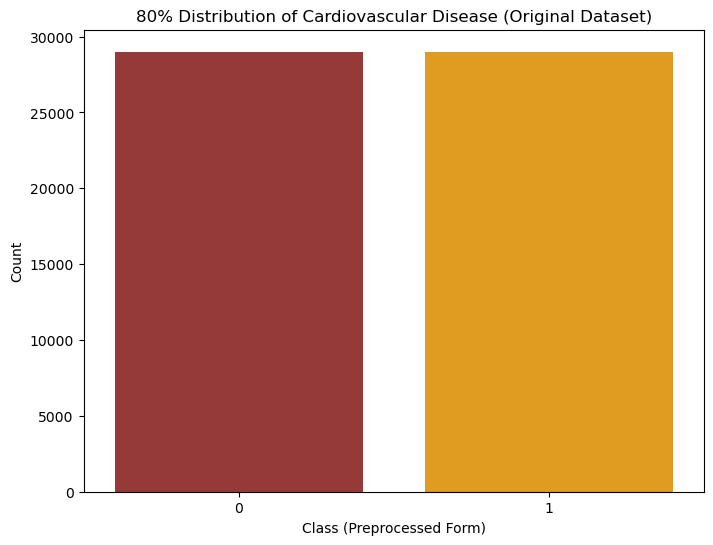

In [74]:
# Re-importing necessary libraries and recreating the plot with custom colors after code execution state reset
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Class_att' is your target column and using custom colors for the bar graph
class_counts1 = {'0': 29000, '1': 29000}  # Example class counts for cardiovascular disease

# Create a bar plot with custom colors
plt.figure(figsize=(8, 6))
sns.barplot(x=list(class_counts1.keys()), y=list(class_counts1.values()), palette=['brown', 'orange'])
plt.xlabel('Class (Preprocessed Form)')
plt.ylabel('Count')
plt.title('80% Distribution of Cardiovascular Disease (Original Dataset)')
plt.show()


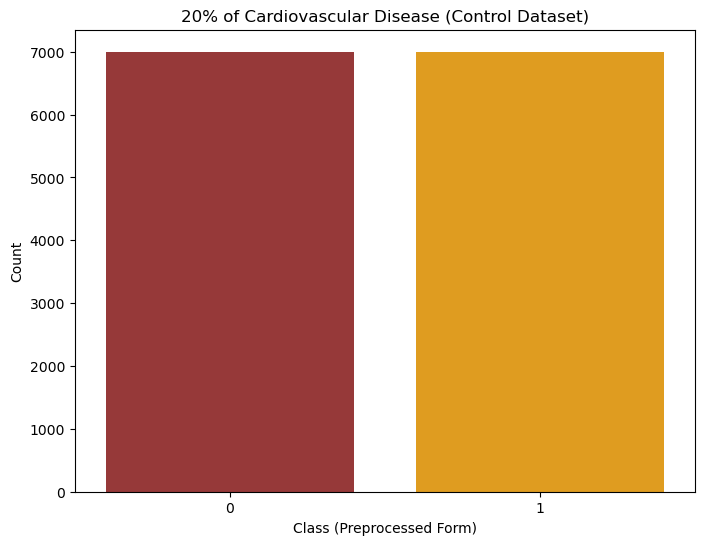

In [75]:
# Re-importing necessary libraries and recreating the plot with custom colors after code execution state reset
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for demonstration purposes
class_counts3 = {"0": 7000, "1": 7000}

# Create a bar plot with custom colors
plt.figure(figsize=(8, 6))
sns.barplot(x=list(class_counts3.keys()), y=list(class_counts3.values()), palette=['brown', 'orange'])
plt.xlabel('Class (Preprocessed Form)')
plt.ylabel('Count')
plt.title('20% of Cardiovascular Disease (Control Dataset)')
plt.show()


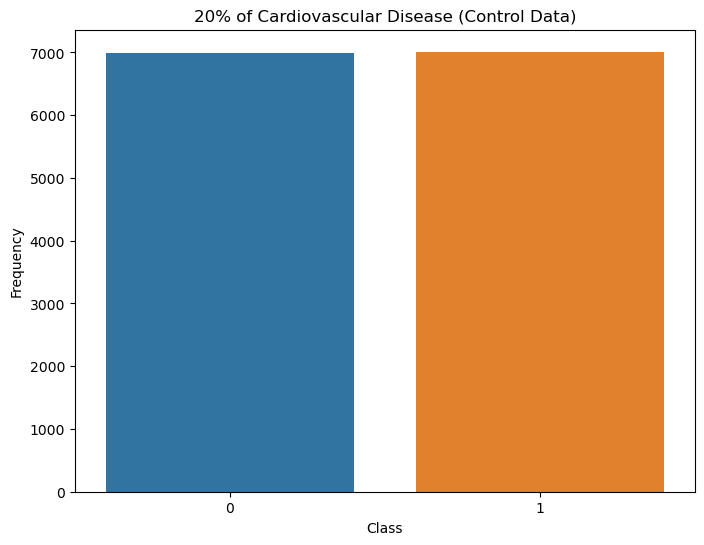

In [61]:
# Assuming 'Class_att' is your target column
class_counts1 = cardiovascular_train_dataframe['cardio'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts1.index, y=class_counts1.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('80% of Cardiovascular Disease (Original Dataset)')
plt.show()

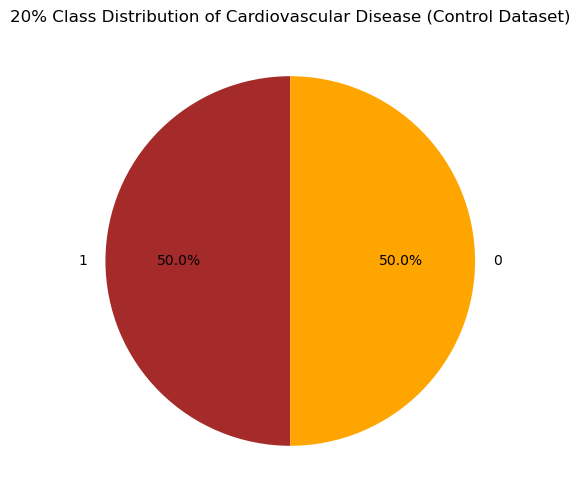

In [65]:
import matplotlib.pyplot as plt

# Assuming 'cardio' is your target column and we have these counts
class_counts3 = {"1": 7000, "0": 7000}
color = ['brown', 'orange']
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts3.values(), labels=class_counts3.keys(), colors = color, autopct='%1.1f%%', startangle=90)
plt.title('20% Class Distribution of Cardiovascular Disease (Control Dataset)')
plt.show()


In [55]:
print('==============20% of Cardiovascular Disease (Control Dataset)===========')
control_cardio_dataframe.info()
cardiovascular_train_dataframe

==============20% of Cardiovascular Disease (Control Dataset)===========
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 46730 to 63452
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          14000 non-null  float64 
 1   gender       14000 non-null  category
 2   height       14000 non-null  float64 
 3   weight       14000 non-null  float64 
 4   ap_hi        14000 non-null  float64 
 5   ap_lo        14000 non-null  float64 
 6   cholesterol  14000 non-null  category
 7   gluc         14000 non-null  category
 8   smoke        14000 non-null  category
 9   alco         14000 non-null  category
 10  active       14000 non-null  category
 11  cardio       14000 non-null  category
dtypes: category(7), float64(5)
memory usage: 752.8 KB


In [57]:
print('==============80% of Cardiovascular Disease (Original Dataset)===========')
cardiovascular_train_dataframe.info()

==============80% of Cardiovascular Disease (Original Dataset)===========
<class 'pandas.core.frame.DataFrame'>
Int64Index: 56000 entries, 47339 to 15795
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          56000 non-null  float64 
 1   gender       56000 non-null  category
 2   height       56000 non-null  float64 
 3   weight       56000 non-null  float64 
 4   ap_hi        56000 non-null  float64 
 5   ap_lo        56000 non-null  float64 
 6   cholesterol  56000 non-null  category
 7   gluc         56000 non-null  category
 8   smoke        56000 non-null  category
 9   alco         56000 non-null  category
 10  active       56000 non-null  category
 11  cardio       56000 non-null  category
dtypes: category(7), float64(5)
memory usage: 2.9 MB


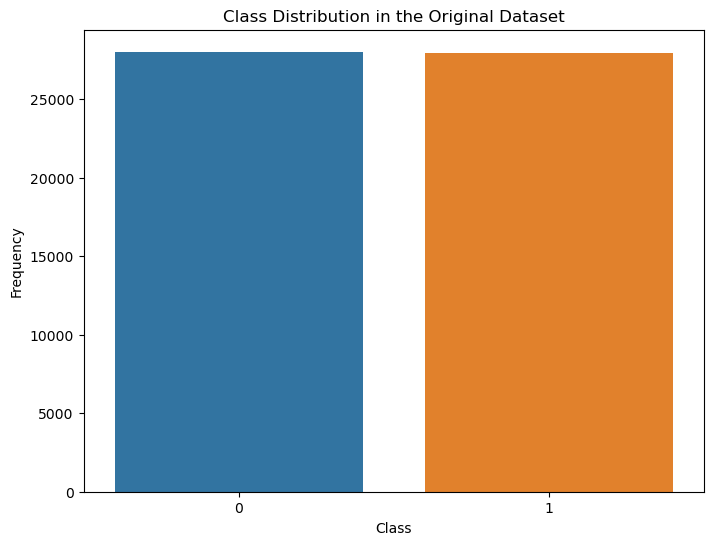

In [25]:
import matplotlib.pyplot as plt
# Assuming 'Class_att' is your target column
class_counts = cardiovascular_train_dataframe['cardio'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in the Original Dataset')
plt.show()

# STEP 3: DEFINING AND TRAINING VARIATIONAL AUTO-ENCODER MODEL, AND GENERATE THE RELEVANT SYNTHETIC DATASET THAT MIMICS ORIGINAL DATA

In [17]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda, Embedding, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE


from sklearn.ensemble import RandomForestClassifier

# Separate features and target
features = cardiovascular_train_dataframe.drop('cardio', axis=1)
labels = cardiovascular_train_dataframe['cardio']

# Split the balanced dataset into training and testing sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(features, labels, test_size=0.2, random_state=42)

# We Normalize features 
scaler = MinMaxScaler()
X_train_orig_scaled = scaler.fit_transform(X_train_orig)
X_test_orig_scaled = scaler.transform(X_test_orig)

# Add noise for autoencoder training
noise_factor = 0.05
X_train_noisy = X_train_orig_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_orig_scaled.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)

# Assuming features and labels have been prepared and scaled
input_dim = X_train_orig_scaled.shape[1]
num_classes = len(np.unique(y_train_orig))

latent_dim = 12  # Latent space dimension

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Encoder network
inputs = Input(shape=(input_dim, ))
labels_input = Input(shape=(1,), dtype='int32')
labels_embedding = Flatten()(Embedding(num_classes, input_dim)(labels_input))
inputs_cond = Concatenate(axis=-1)([inputs, labels_embedding])
x = Dense(64, activation='relu')(inputs_cond)
z_mean = Dense(latent_dim)(x)
z_log_var = Dense(latent_dim)(x)
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder network
latent_inputs = Input(shape=(latent_dim,))
labels_embedding_dec = Flatten()(Embedding(num_classes, latent_dim)(labels_input))
latent_cond = Concatenate(axis=-1)([latent_inputs, labels_embedding_dec])
x_decoded = Dense(64, activation='relu')(latent_cond)
outputs = Dense(input_dim, activation='sigmoid')(x_decoded)

# Instantiate encoder and decoder models
encoder = Model([inputs, labels_input], [z_mean, z_log_var, z], name='encoder')
decoder = Model([latent_inputs, labels_input], outputs, name='decoder')

# VAE model
outputs_vae = decoder([encoder([inputs, labels_input])[2], labels_input])
vae_cardiovascular = Model([inputs, labels_input], outputs_vae, name='vae_cardiovascular')

# Define VAE loss
reconstruction_loss = K.sum(K.binary_crossentropy(inputs, outputs_vae), axis=-1)
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae_cardiovascular.add_loss(vae_loss)
vae_cardiovascular.compile(optimizer='adam')

# Training the VAE
vae_cardiovascular.fit([X_train_orig_scaled, y_train_orig], features, epochs=1000, batch_size=256, validation_split=0.2)

# Generating synthetic data
def generate_synthetic_data(num_samples, num_classes):
    latent_samples = np.random.normal(size=(num_samples, latent_dim))
    sampled_labels = np.random.randint(0, num_classes, num_samples)
    synthetic_data = decoder.predict([latent_samples, sampled_labels])
    return synthetic_data, sampled_labels

synthetic_data, synthetic_labels = generate_synthetic_data(56000, num_classes)

# Transform synthetic data back to original space (if features were scaled)
synthetic_data_rescaled = scaler.inverse_transform(synthetic_data)

# Convert to DataFrame and Series for ease of use
vae_synthetic_data_df = pd.DataFrame(synthetic_data_rescaled, columns=features.columns)
vae_synthetic_labels_series = pd.Series(synthetic_labels, name='cardio')

print(vae_synthetic_data_df.head())
print(vae_synthetic_labels_series.head())

Epoch 1/1000
140/140 [==============================] - 2s 5ms/step - loss: 5.6393 - val_loss: 4.6477
Epoch 2/1000
140/140 [==============================] - 0s 4ms/step - loss: 4.5734 - val_loss: 4.5502
Epoch 3/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.5284 - val_loss: 4.5180
Epoch 4/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.5021 - val_loss: 4.4935
Epoch 5/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4837 - val_loss: 4.4663
Epoch 6/1000
140/140 [==============================] - 1s 4ms/step - loss: 4.4703 - val_loss: 4.4632
Epoch 7/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4594 - val_loss: 4.4650
Epoch 8/1000
140/140 [==============================] - 0s 4ms/step - loss: 4.4538 - val_loss: 4.4726
Epoch 9/1000
140/140 [==============================] - 1s 4ms/step - loss: 4.4536 - val_loss: 4.4568
Epoch 10/1000
140/140 [==============================] - 1s 4ms/step - loss: 4.444

140/140 [==============================] - 0s 3ms/step - loss: 4.4241 - val_loss: 4.4423
Epoch 81/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4311 - val_loss: 4.4286
Epoch 82/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4384 - val_loss: 4.4307
Epoch 83/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4299 - val_loss: 4.4339
Epoch 84/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4405 - val_loss: 4.4411
Epoch 85/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4360 - val_loss: 4.4261
Epoch 86/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4349 - val_loss: 4.4471
Epoch 87/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4328 - val_loss: 4.4511
Epoch 88/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4273 - val_loss: 4.4404
Epoch 89/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4296 - v

140/140 [==============================] - 0s 3ms/step - loss: 4.4306 - val_loss: 4.4415
Epoch 160/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4297 - val_loss: 4.4323
Epoch 161/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4328 - val_loss: 4.4348
Epoch 162/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4279 - val_loss: 4.4224
Epoch 163/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4316 - val_loss: 4.4400
Epoch 164/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4331 - val_loss: 4.4346
Epoch 165/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4293 - val_loss: 4.4285
Epoch 166/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4326 - val_loss: 4.4317
Epoch 167/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4336 - val_loss: 4.4362
Epoch 168/1000
140/140 [==============================] - 0s 3ms/step - loss: 4

Epoch 238/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4331 - val_loss: 4.4341
Epoch 239/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4340 - val_loss: 4.4196
Epoch 240/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4387 - val_loss: 4.4248
Epoch 241/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4291 - val_loss: 4.4287
Epoch 242/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4309 - val_loss: 4.4366
Epoch 243/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4322 - val_loss: 4.4401
Epoch 244/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4353 - val_loss: 4.4391
Epoch 245/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4278 - val_loss: 4.4468
Epoch 246/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4317 - val_loss: 4.4173
Epoch 247/1000
140/140 [==============================] - 0s 3ms

Epoch 317/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4330 - val_loss: 4.4358
Epoch 318/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4294 - val_loss: 4.4418
Epoch 319/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4356 - val_loss: 4.4435
Epoch 320/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4333 - val_loss: 4.4287
Epoch 321/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4302 - val_loss: 4.4413
Epoch 322/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4274 - val_loss: 4.4326
Epoch 323/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4330 - val_loss: 4.4233
Epoch 324/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4364 - val_loss: 4.4172
Epoch 325/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4268 - val_loss: 4.4171
Epoch 326/1000
140/140 [==============================] - 0s 3ms

Epoch 396/1000
140/140 [==============================] - 0s 4ms/step - loss: 4.4319 - val_loss: 4.4369
Epoch 397/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4284 - val_loss: 4.4203
Epoch 398/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4288 - val_loss: 4.4345
Epoch 399/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4299 - val_loss: 4.4354
Epoch 400/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4317 - val_loss: 4.4342
Epoch 401/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4349 - val_loss: 4.4330
Epoch 402/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4251 - val_loss: 4.4403
Epoch 403/1000
140/140 [==============================] - 1s 4ms/step - loss: 4.4363 - val_loss: 4.4343
Epoch 404/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4275 - val_loss: 4.4336
Epoch 405/1000
140/140 [==============================] - 1s 4ms

Epoch 475/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4287 - val_loss: 4.4387
Epoch 476/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4284 - val_loss: 4.4339
Epoch 477/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4312 - val_loss: 4.4407
Epoch 478/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4349 - val_loss: 4.4235
Epoch 479/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4311 - val_loss: 4.4292
Epoch 480/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4427 - val_loss: 4.4256
Epoch 481/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4340 - val_loss: 4.4361
Epoch 482/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4368 - val_loss: 4.4231
Epoch 483/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4311 - val_loss: 4.4285
Epoch 484/1000
140/140 [==============================] - 0s 3ms

Epoch 554/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4301 - val_loss: 4.4478
Epoch 555/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4298 - val_loss: 4.4335
Epoch 556/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4318 - val_loss: 4.4388
Epoch 557/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4308 - val_loss: 4.4334
Epoch 558/1000
140/140 [==============================] - 0s 4ms/step - loss: 4.4330 - val_loss: 4.4252
Epoch 559/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4261 - val_loss: 4.4327
Epoch 560/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4281 - val_loss: 4.4313
Epoch 561/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4215 - val_loss: 4.4364
Epoch 562/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4296 - val_loss: 4.4380
Epoch 563/1000
140/140 [==============================] - 0s 3ms

Epoch 633/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4298 - val_loss: 4.4213
Epoch 634/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4297 - val_loss: 4.4430
Epoch 635/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4340 - val_loss: 4.4397
Epoch 636/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4281 - val_loss: 4.4297
Epoch 637/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4247 - val_loss: 4.4327
Epoch 638/1000
140/140 [==============================] - 1s 4ms/step - loss: 4.4259 - val_loss: 4.4304
Epoch 639/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4261 - val_loss: 4.4178
Epoch 640/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4271 - val_loss: 4.4379
Epoch 641/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4221 - val_loss: 4.4452
Epoch 642/1000
140/140 [==============================] - 0s 3ms

Epoch 712/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4339 - val_loss: 4.4317
Epoch 713/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4259 - val_loss: 4.4267
Epoch 714/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4239 - val_loss: 4.4294
Epoch 715/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4280 - val_loss: 4.4297
Epoch 716/1000
140/140 [==============================] - 1s 4ms/step - loss: 4.4282 - val_loss: 4.4309
Epoch 717/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4278 - val_loss: 4.4270
Epoch 718/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4292 - val_loss: 4.4330
Epoch 719/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4283 - val_loss: 4.4343
Epoch 720/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4246 - val_loss: 4.4232
Epoch 721/1000
140/140 [==============================] - 0s 3ms

Epoch 791/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4332 - val_loss: 4.4242
Epoch 792/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4281 - val_loss: 4.4260
Epoch 793/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4225 - val_loss: 4.4269
Epoch 794/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4299 - val_loss: 4.4256
Epoch 795/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4206 - val_loss: 4.4270
Epoch 796/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4271 - val_loss: 4.4379
Epoch 797/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4362 - val_loss: 4.4414
Epoch 798/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4322 - val_loss: 4.4162
Epoch 799/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4356 - val_loss: 4.4355
Epoch 800/1000
140/140 [==============================] - 0s 3ms

Epoch 870/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4288 - val_loss: 4.4312
Epoch 871/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4291 - val_loss: 4.4213
Epoch 872/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4235 - val_loss: 4.4391
Epoch 873/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4256 - val_loss: 4.4333
Epoch 874/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4323 - val_loss: 4.4261
Epoch 875/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4317 - val_loss: 4.4255
Epoch 876/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4347 - val_loss: 4.4256
Epoch 877/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4224 - val_loss: 4.4162
Epoch 878/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4242 - val_loss: 4.4371
Epoch 879/1000
140/140 [==============================] - 0s 3ms

Epoch 949/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4284 - val_loss: 4.4240
Epoch 950/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4268 - val_loss: 4.4290
Epoch 951/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4346 - val_loss: 4.4418
Epoch 952/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4259 - val_loss: 4.4215
Epoch 953/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4299 - val_loss: 4.4257
Epoch 954/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4253 - val_loss: 4.4214
Epoch 955/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4246 - val_loss: 4.4396
Epoch 956/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4279 - val_loss: 4.4413
Epoch 957/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4246 - val_loss: 4.4355
Epoch 958/1000
140/140 [==============================] - 0s 3ms

# SAVE THE ABOVE CREATED GENERATIVE VARIATIONAL AUTOENCODER MODEL
You can use the save method provided by Keras to save the entire model or the individual components (encoder and decoder) to a file. This method will save the architecture, weights, and training configuration in a single file.

In [18]:
# Save the entire VAE
vae_cardiovascular.save('vae_cardiovascular_model.h5')

# Optionally, save just the encoder or decoder if you need to use them separately
encoder.save('vae_encoder_cardiovascular_model.h5')
decoder.save('vae_decoder_cardiovascular_model.h5')


C:\Users\Ede\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
# Save the entire VAE using .keras extension 
vae_cardiovascular.save('vae_cardiovascular_model.keras') # Saves the model to an HDF5 file

# Optionally, save just the encoder or decoder if you need to use them separately
encoder.save('vae_encoder_cardiovascular_model.keras')
decoder.save('vae_decoder_cardiovascular_model.keras')


# LOAD THE ABOVE SAVED GENERATIVE AUTOENCODER MODEL

In [ ]:
from tensorflow.keras.models import load_model

# Load the VAE, encoder, and decoder
loaded_vae = load_model('vae_cardiovascular_model.h5')
loaded_encoder = load_model('vae_encoder_model.h5')
loaded_decoder = load_model('vae_decoder_model.h5')

# Join the Generated Synthetic Data and labels

In [20]:
import pandas as pd

# Join the labels with the synthetic data
vae_synthetic_cardio_data_labels_df = vae_synthetic_data_df.assign(cardio=vae_synthetic_labels_series.values)

In [21]:
vae_synthetic_cardio_data_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          56000 non-null  float32
 1   gender       56000 non-null  float32
 2   height       56000 non-null  float32
 3   weight       56000 non-null  float32
 4   ap_hi        56000 non-null  float32
 5   ap_lo        56000 non-null  float32
 6   cholesterol  56000 non-null  float32
 7   gluc         56000 non-null  float32
 8   smoke        56000 non-null  float32
 9   alco         56000 non-null  float32
 10  active       56000 non-null  float32
 11  cardio       56000 non-null  int32  
dtypes: float32(11), int32(1)
memory usage: 2.6 MB


In [180]:
control_cardio_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 46730 to 63452
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          14000 non-null  float64 
 1   gender       14000 non-null  category
 2   height       14000 non-null  float64 
 3   weight       14000 non-null  float64 
 4   ap_hi        14000 non-null  float64 
 5   ap_lo        14000 non-null  float64 
 6   cholesterol  14000 non-null  category
 7   gluc         14000 non-null  category
 8   smoke        14000 non-null  category
 9   alco         14000 non-null  category
 10  active       14000 non-null  category
 11  cardio       14000 non-null  category
dtypes: category(7), float64(5)
memory usage: 752.8 KB


In [179]:
cardiovascular_train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56000 entries, 47339 to 15795
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          56000 non-null  float64 
 1   gender       56000 non-null  category
 2   height       56000 non-null  float64 
 3   weight       56000 non-null  float64 
 4   ap_hi        56000 non-null  float64 
 5   ap_lo        56000 non-null  float64 
 6   cholesterol  56000 non-null  category
 7   gluc         56000 non-null  category
 8   smoke        56000 non-null  category
 9   alco         56000 non-null  category
 10  active       56000 non-null  category
 11  cardio       56000 non-null  category
dtypes: category(7), float64(5)
memory usage: 2.9 MB


In [22]:
vae_synthetic_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          56000 non-null  float32
 1   gender       56000 non-null  float32
 2   height       56000 non-null  float32
 3   weight       56000 non-null  float32
 4   ap_hi        56000 non-null  float32
 5   ap_lo        56000 non-null  float32
 6   cholesterol  56000 non-null  float32
 7   gluc         56000 non-null  float32
 8   smoke        56000 non-null  float32
 9   alco         56000 non-null  float32
 10  active       56000 non-null  float32
dtypes: float32(11)
memory usage: 2.3 MB


# SAVING THE GENERATED VAE SYNTHETIC DATASET TO CSV

In [23]:
# Save the generated synthetic data to a CSV file

vae_synthetic_cardio_data_labels_df.to_csv(r'C:\Users\Ede\Desktop\Synthetic_Real_Data_Using_AE_VAE_Techniques\master_thesis2024\vae_synthetic_cardio_data_labels_df.csv', index=False)

In [23]:
# Split the dataset into training and testing sets
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(vae_synthetic_data_df, vae_synthetic_labels_series, test_size=0.2, random_state=42)

# vae_synthetic_cardio_data_labels_df

# Confirm the shapes
print("X_train_syn shape:", X_train_syn.shape)
print("X_test_syn shape:", X_test_syn.shape)
print("y_train_syn shape:", y_train_syn.shape)
print("y_test_syn shape:", y_test_syn.shape)

X_train_syn shape: (44800, 11)
X_test_syn shape: (11200, 11)
y_train_syn shape: (44800,)
y_test_syn shape: (11200,)


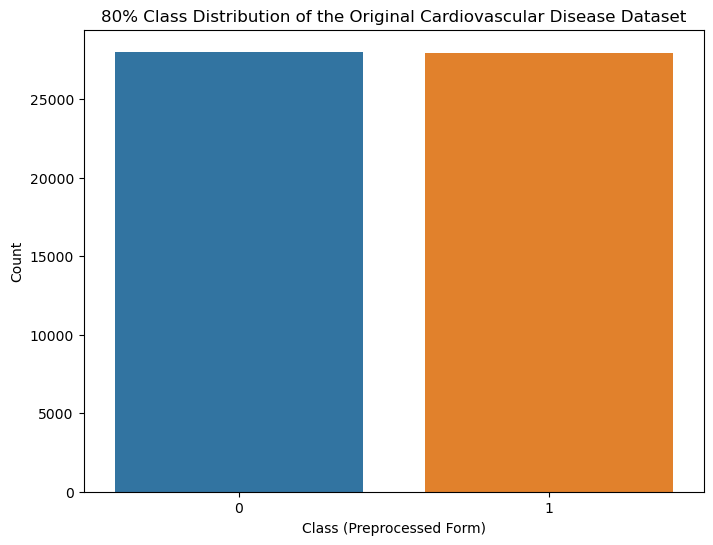

In [154]:
import matplotlib.pyplot as plt
# Assuming 'Class_att' is your target column
class_counts = cardiovascular_train_dataframe['cardio'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class (Preprocessed Form)')
plt.ylabel('Count')
plt.title('80% Class Distribution of the Original Cardiovascular Disease Dataset')
plt.show()

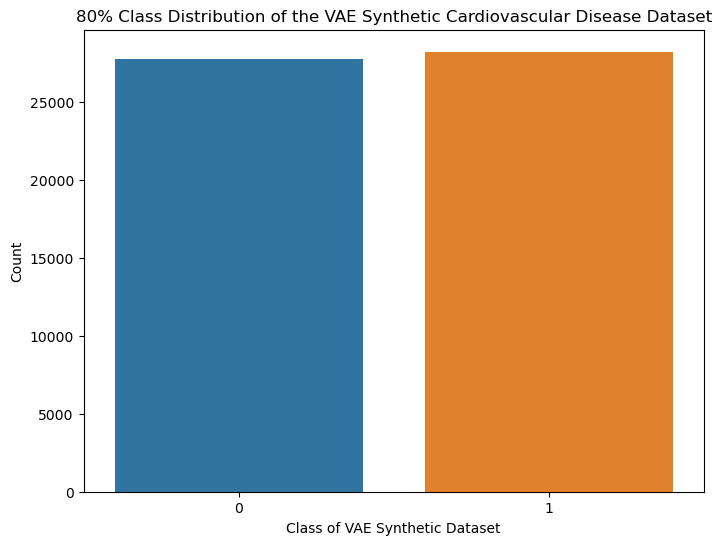

In [153]:
import matplotlib.pyplot as plt
# Assuming 'Class_att' is your target column
class_counts = vae_synthetic_cardio_data_labels_df_newest['cardio'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class of VAE Synthetic Dataset')
plt.ylabel('Count')
plt.title('80% Class Distribution of the VAE Synthetic Cardiovascular Disease Dataset')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

featuresORIG = cardiovascular_train_dataframe.drop('cardio', axis=1)
labelsORIG = cardiovascular_train_dataframe['cardio']

# Split the original dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresORIG, labelsORIG, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train_orig shape:", X_train_orig.shape)
print("X_test_orig shape:", X_test_orig.shape)
print("y_train_orig shape:", y_train_orig.shape)
print("y_test_orig shape:", y_test_orig.shape)

X_train_orig shape: (44800, 11)
X_test_orig shape: (11200, 11)
y_train_orig shape: (44800,)
y_test_orig shape: (11200,)


In [29]:
#control_cardio_dataframe

from sklearn.model_selection import train_test_split

featuresCONT = control_cardio_dataframe.drop('cardio', axis=1)
labelsCONT = control_cardio_dataframe['cardio']

# Split the original dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train_cont shape:", X_train_cont.shape)
print("X_test_cont shape:", X_test_cont.shape)
print("y_train_cont shape:", y_train_cont.shape)
print("y_test_cont shape:", y_test_cont.shape)

X_train_cont shape: (11200, 11)
X_test_cont shape: (2800, 11)
y_train_cont shape: (11200,)
y_test_cont shape: (2800,)


In [24]:
featuresVAE = vae_synthetic_cardio_data_labels_df.drop('cardio', axis=1)
labelsVAE = vae_synthetic_cardio_data_labels_df['cardio']


# Split the dataset into training and testing sets
X_train_syn_vae, X_test_syn_vae, y_train_syn_vae, y_test_syn_vae = train_test_split(featuresVAE, labelsVAE, test_size=0.2, random_state=42)

# vae_synthetic_cardio_data_labels_df

# Confirm the shapes
print("X_train_syn_vae shape:", X_train_syn_vae.shape)
print("X_test_syn_vae shape:", X_test_syn_vae.shape)
print("y_train_syn_vae shape:", y_train_syn_vae.shape)
print("y_test_syn_vae shape:", y_test_syn_vae.shape)

X_train_syn_vae shape: (44800, 11)
X_test_syn_vae shape: (11200, 11)
y_train_syn_vae shape: (44800,)
y_test_syn_vae shape: (11200,)


In [33]:
# Split the synthetic dataset
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(vae_synthetic_data_df, vae_synthetic_labels_series, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train_syn shape:", X_train_syn.shape)
print("X_test_syn shape:", X_test_syn.shape)
print("y_train_syn shape:", y_train_syn.shape)
print("y_test_syn shape:", y_test_syn.shape)

X_train_syn shape: (44800, 11)
X_test_syn shape: (11200, 11)
y_train_syn shape: (44800,)
y_test_syn shape: (11200,)


# MICRO-AVERAGE ROC CURVES

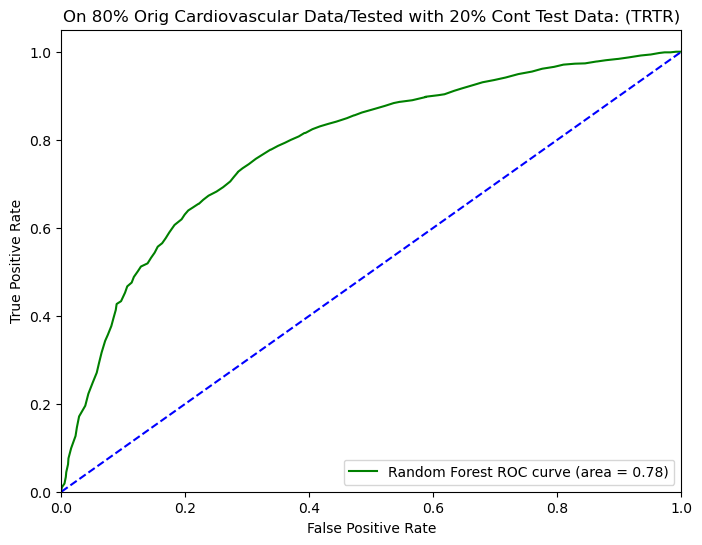

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Sample data preparation steps (replace with your actual DataFrame names)
# Recall 'featuresORIG' and 'labelsORIG' are our original dataset features and labels above
# Recall 'featuresCONT' and 'labelsCONT' are our control (or synthetic) dataset features and labels above

# Split the original dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresORIG, labelsORIG, test_size=0.2, random_state=42)

# Split the control dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier on the original dataset
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_orig, y_train_orig)

# Predict probabilities on the control dataset
y_score = classifier.predict_proba(X_test_cont)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_cont, y_score[:, 1])  # Assuming the positive class is labeled as '1'
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label='Random Forest ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Orig Cardiovascular Data/Tested with 20% Cont Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


# Computational and Graphical Representations of AUC-ROC Curves by Classifiers

[LightGBM] [Info] Number of positive: 22392, number of negative: 22408
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 44800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499821 -> initscore=-0.000714
[LightGBM] [Info] Start training from score -0.000714
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


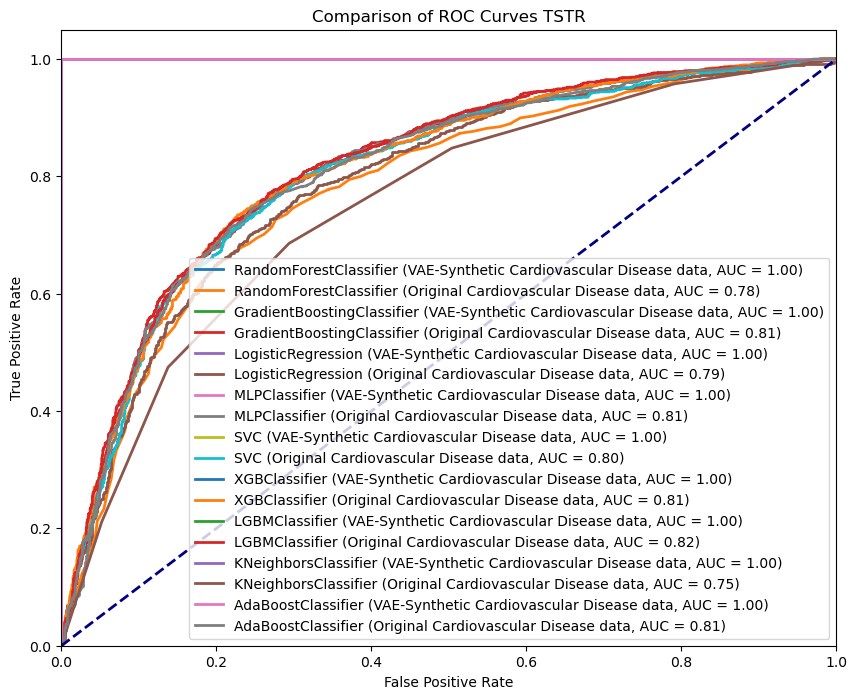

In [31]:
# 1. Import Necessary Libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


# 2. Define Data Splits for Original and Control Datasets
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)
X_train_syn_vae, X_test_syn_vae, y_train_syn_vae, y_test_syn_vae = train_test_split(featuresVAE, labelsVAE, test_size=0.2, random_state=42)

# 3. Scale the Data
scaler = StandardScaler()
X_train_syn_vae_scaled = scaler.fit_transform(X_train_syn_vae)
X_test_syn_vae_scaled = scaler.transform(X_test_syn_vae)
X_train_cont_scaled = scaler.transform(X_train_cont)
X_test_cont_scaled = scaler.transform(X_test_cont)

# Assuming featuresCONT and labelsCONT are your control dataset and its corresponding labels
X_cont_scaled = scaler.transform(featuresCONT)

# 4. Split and Scale the Synthetic Dataset
X_train_cont_scaled, X_test_cont_scaled, y_train_cont, y_test_cont = train_test_split(X_cont_scaled, labelsCONT, test_size=0.2, random_state=42)


# 5. Define the `plot_auc_roc` Function
def plot_auc_roc(model, X_train, y_train, X_test, y_test, data_type):
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(X_test)
    else:
        raise AttributeError(f"{model.__class__.__name__} does not have predict_proba or decision_function.")
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model.__class__.__name__} ({data_type} data, AUC = {roc_auc:.2f})')

# 6. Define Models
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(),
    "SVC": SVC(probability=True),
    "XGBClassifier": XGBClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
}

# 7. Plot AUC-ROC Curves for Models Trained on Synthetic and Real Data
plt.figure(figsize=(10, 8))
for name, model in models.items():
    plot_auc_roc(model, X_train_syn_vae_scaled, y_train_syn_vae, X_test_syn_vae_scaled, y_test_syn_vae, "VAE-Synthetic Cardiovascular Disease")
    plot_auc_roc(model, X_train_cont_scaled, y_train_cont, X_test_cont_scaled, y_test_cont, "Original Cardiovascular Disease")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves TSTR')
plt.legend(loc="lower right")
plt.show()


[LightGBM] [Info] Number of positive: 22315, number of negative: 22485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 44800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498103 -> initscore=-0.007589
[LightGBM] [Info] Start training from score -0.007589


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


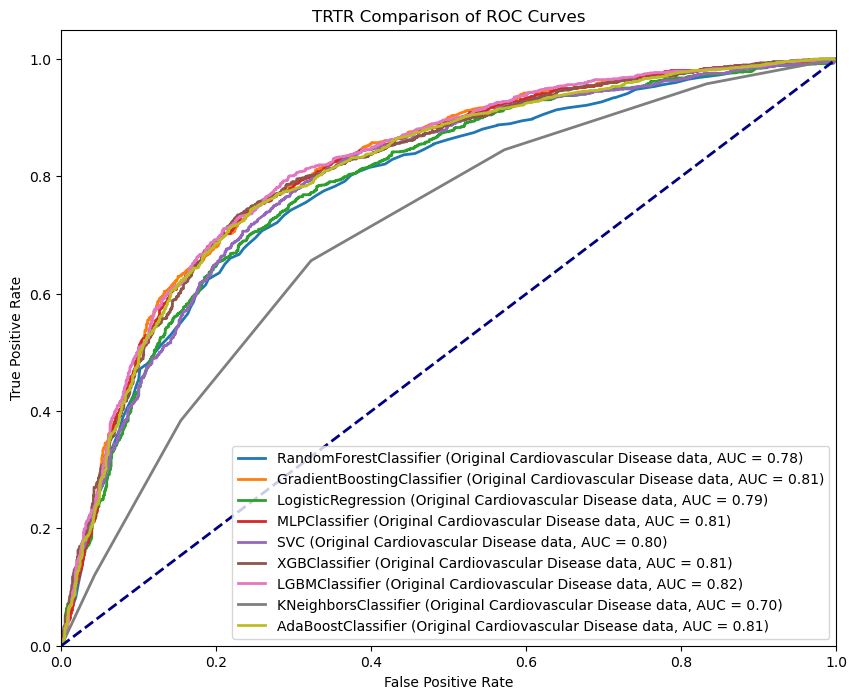

In [32]:
# 1. Import Necessary Libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# 2. Define Data Splits for Original Dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresORIG, labelsORIG, test_size=0.2, random_state=42)
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)



# 3. Scale the Data
scaler = StandardScaler()
X_train_orig_scaled = scaler.fit_transform(X_train_orig)
X_test_cont_scaled = scaler.transform(X_test_cont)

# 5. Define the `plot_auc_roc` Function
def plot_auc_roc(model, X_train, y_train, X_test, y_test, data_type):
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(X_test)
    else:
        raise AttributeError(f"{model.__class__.__name__} does not have predict_proba or decision_function.")
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model.__class__.__name__} ({data_type} data, AUC = {roc_auc:.2f})')

# 6. Define Models
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(),
    "SVC": SVC(probability=True),
    "XGBClassifier": XGBClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
}

# 7. Plot AUC-ROC Curves for Models Trained on Original Data
plt.figure(figsize=(10, 8))
for name, model in models.items():
    plot_auc_roc(model, X_train_orig_scaled, y_train_orig, X_test_cont_scaled, y_test_cont, "Original Cardiovascular Disease")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TRTR Comparison of ROC Curves')
plt.legend(loc="lower right")
plt.show()


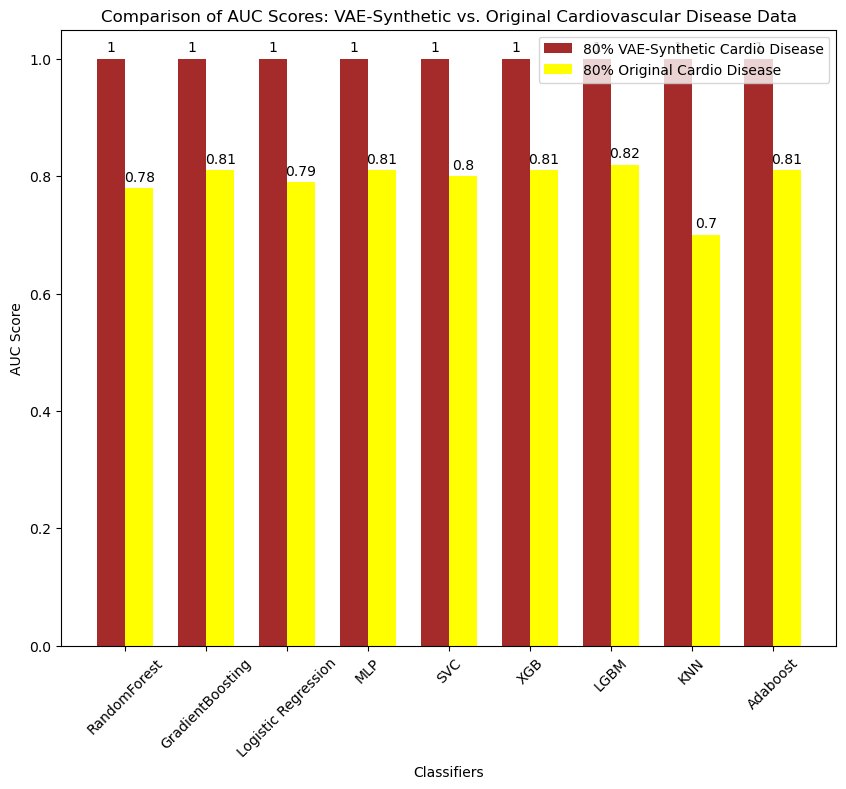

In [157]:
import matplotlib.pyplot as plt
import numpy as np

# Classifiers and their corresponding AUC scores for synthetic and original data
classifiers = ['RandomForest', 'GradientBoosting', 'Logistic Regression', 'MLP', 'SVC', 'XGB', 'LGBM', 'KNN', 'Adaboost']
synth_auc = [1.00] * 9
orig_auc = [0.78, 0.81, 0.79, 0.81, 0.80, 0.81, 0.82, 0.70, 0.81]

x = np.arange(len(classifiers))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 8))
rects1 = ax.bar(x - width/2, synth_auc, width, label='80% VAE-Synthetic Cardio Disease', color='brown')
rects2 = ax.bar(x + width/2, orig_auc, width, label='80% Original Cardio Disease', color='yellow')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classifiers')
ax.set_ylabel('AUC Score')
ax.set_title('Comparison of AUC Scores: VAE-Synthetic vs. Original Cardiovascular Disease Data')
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.xticks(rotation=45)
plt.show()


# COMPUTING CROSS-VALIDATION OF ORIGINAL AND VAE-SYNTHETIC CARDIOVASCULAR DISEASE DATASETS

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# vae_synthetic_data_df
# vae_synthetic_labels_series.


# Assuming final_synthetic_df and final_synthetic_labels are your features and labels DataFrames
# Encoding categorical labels if necessary
le = LabelEncoder()
vae_synthetic_labels_ae_encoded = le.fit_transform(vae_synthetic_labels_series)

# Splitting the dataset
X_train_syn_vae, X_test_syn_vae, y_train_syn_vae, y_test_syn_vae = train_test_split(vae_synthetic_data_df, vae_synthetic_labels_ae_encoded, test_size=0.2, random_state=42)

# List of classifiers to evaluate
classifiers = [
    DecisionTreeClassifier(random_state=2),
    GradientBoostingClassifier(random_state=2),
    RandomForestClassifier(n_estimators=100, random_state=2),
    AdaBoostClassifier(random_state=2),
    LGBMClassifier(random_state=2),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000, random_state=2),
    SVC(random_state=2),
    MLPClassifier(max_iter=1000, random_state=2)
]

# Evaluate each classifier
for clf in classifiers:
    cv_scores = cross_val_score(clf, X_train_syn_vae, y_train_syn_vae, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    print(f"{clf.__class__.__name__}: Mean CV Accuracy for 80% VAE-Synthetic Cardiovascular Disease = {mean_cv_score:.4f}, Std = {std_cv_score:.4f}")


DecisionTreeClassifier: Mean CV Accuracy for 80% VAE-Synthetic Cardiovascular Disease = 1.0000, Std = 0.0001
GradientBoostingClassifier: Mean CV Accuracy for 80% VAE-Synthetic Cardiovascular Disease = 1.0000, Std = 0.0001
RandomForestClassifier: Mean CV Accuracy for 80% VAE-Synthetic Cardiovascular Disease = 1.0000, Std = 0.0000


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anacond

AdaBoostClassifier: Mean CV Accuracy for 80% VAE-Synthetic Cardiovascular Disease = 1.0000, Std = 0.0000
[LightGBM] [Info] Number of positive: 17913, number of negative: 17927
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 35840, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499805 -> initscore=-0.000781
[LightGBM] [Info] Start training from score -0.000781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 17914, number of negative: 17926
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 35840, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499833 -> initscore=-0.000670
[LightGBM] [Info] Start training from score -0.000670
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Convert categorical columns to numeric codes for the entire dataset
featuresORIG_num = featuresORIG.copy()
for col in featuresORIG.select_dtypes(include=['category']).columns:
    featuresORIG_num[col] = featuresORIG[col].cat.codes
    
# Assuming final_synthetic_df and final_synthetic_labels are your features and labels DataFrames
# Encoding categorical labels if necessary
le = LabelEncoder()
original_labels_encoded = le.fit_transform(labelsORIG)


# Proceed with your original process by Splitting the original dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresORIG_num, original_labels_encoded, test_size=0.2, random_state=42)


# List of classifiers to evaluate
classifiers = [
    DecisionTreeClassifier(random_state=2),
    GradientBoostingClassifier(random_state=2),
    RandomForestClassifier(n_estimators=100, random_state=2),
    AdaBoostClassifier(random_state=2),
    LGBMClassifier(random_state=2),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000, random_state=2),
    SVC(random_state=2),
    MLPClassifier(max_iter=1000, random_state=2)
]

# Evaluate each classifier
for clf in classifiers:
    cv_scores = cross_val_score(clf, X_train_orig, y_train_orig, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    print(f"{clf.__class__.__name__}: Mean CV Accuracy for 80% Original Cardiovascular Disease Data= {mean_cv_score:.4f}, Std = {std_cv_score:.4f}")


DecisionTreeClassifier: Mean CV Accuracy for 80% Original Cardiovascular Disease Data= 0.6349, Std = 0.0032
GradientBoostingClassifier: Mean CV Accuracy for 80% Original Cardiovascular Disease Data= 0.7338, Std = 0.0021
RandomForestClassifier: Mean CV Accuracy for 80% Original Cardiovascular Disease Data= 0.7143, Std = 0.0020


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anacond

AdaBoostClassifier: Mean CV Accuracy for 80% Original Cardiovascular Disease Data= 0.7279, Std = 0.0033
[LightGBM] [Info] Number of positive: 17852, number of negative: 17988
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 35840, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498103 -> initscore=-0.007589
[LightGBM] [Info] Start training from score -0.007589
[LightGBM] [Info] Number of positive: 17852, number of negative: 17988
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM

# GRAPHICAL REPRESENTATION OF THE ABOVE MEAN CV OF ORIGINAL AND SYNTHETIC DATASETS

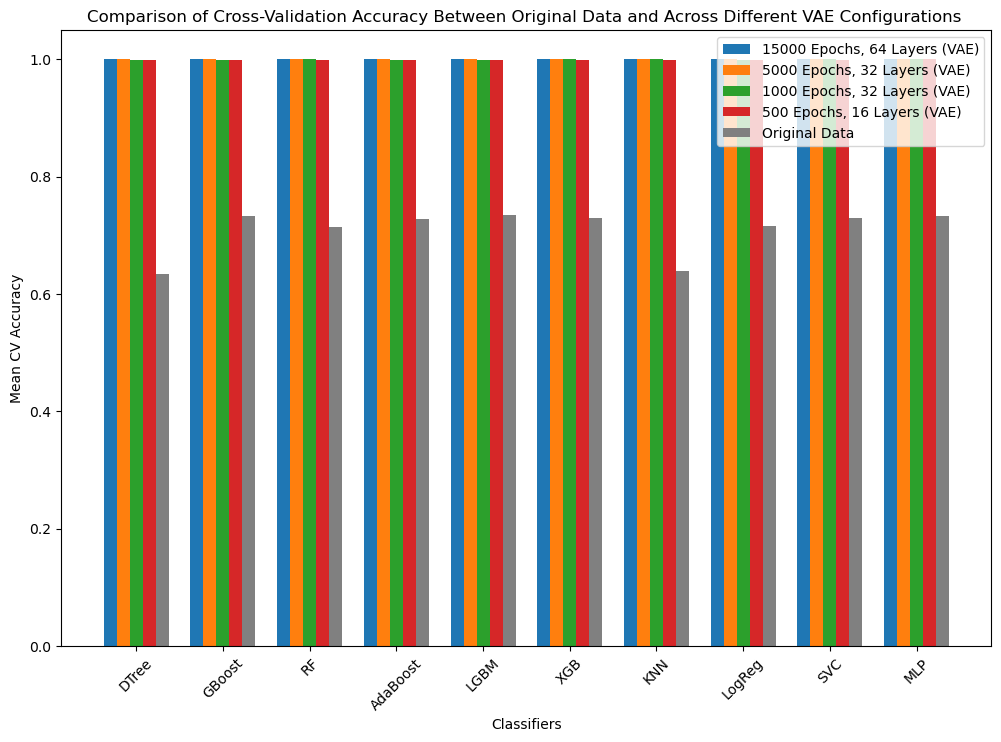

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Data for synthetic datasets
classifiers = ['DTree', 'GBoost', 'RF', 'AdaBoost', 'LGBM', 'XGB', 'KNN', 'LogReg', 'SVC', 'MLP']
epochs_15000 = [1.0000] * 10
epochs_5000 = [1.0000] * 10
epochs_1000 = [0.9998, 0.9999, 1.0000, 0.9999, 0.9999, 1.0000, 1.0000, 0.9999, 1.0000, 1.0000]
epochs_500 = [0.9996, 0.9997, 0.9997, 0.9999, 0.9998, 0.9998, 0.9999, 0.9998, 0.9999, 1.0000]

# Data for original dataset
original_data = [0.6349, 0.7338, 0.7143, 0.7279, 0.7352, 0.7293, 0.6395, 0.7158, 0.7291, 0.7324]

x = np.arange(len(classifiers))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - 2*width, epochs_15000, width, label='15000 Epochs, 64 Layers (VAE)')
rects2 = ax.bar(x - width, epochs_5000, width, label='5000 Epochs, 32 Layers (VAE)')
rects3 = ax.bar(x, epochs_1000, width, label='1000 Epochs, 32 Layers (VAE)')
rects4 = ax.bar(x + width, epochs_500, width, label='500 Epochs, 16 Layers (VAE)')
rects5 = ax.bar(x + 2*width, original_data, width, label='Original Data', color='grey')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classifiers')
ax.set_ylabel('Mean CV Accuracy')
ax.set_title('Comparison of Cross-Validation Accuracy Between Original Data and Across Different VAE Configurations ')
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=45) 
ax.legend()

plt.show() 


# Computing Numerical Statistical Values: KS-Test, P-Value, MSE, RMSE, MAE, F-Test for Variances, T-Test for Means

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ks_2samp, f_oneway, ttest_ind
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Initialize Label Encoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    combined_data = pd.concat([vae_synthetic_cardio_data_labels_df[col], cardiovascular_train_dataframe[col]], axis=0)
    le.fit(combined_data)  # Fit on combined data to ensure all categories are covered
    vae_synthetic_cardio_data_labels_df[col] = le.transform(vae_synthetic_cardio_data_labels_df[col])
    cardiovascular_train_dataframe[col] = le.transform(cardiovascular_train_dataframe[col])

# Assuming you've already split your datasets into features and labels if necessary
# Now you can proceed with statistical analyses

results = []

for column in vae_synthetic_cardio_data_labels_df.columns.drop('cardio'):  # Assuming 'cardio' is the label column
    # Compute KS Test and P-Value
    ks_stat, ks_pvalue = ks_2samp(cardiovascular_train_dataframe[column], vae_synthetic_cardio_data_labels_df[column])

    # Compute MSE, RMSE, and MAE
    mse = mean_squared_error(cardiovascular_train_dataframe[column], vae_synthetic_cardio_data_labels_df[column])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(cardiovascular_train_dataframe[column], vae_synthetic_cardio_data_labels_df[column])

    # Compute F-Test and T-Test for comparing variances and means
    f_stat, f_pvalue = f_oneway(cardiovascular_train_dataframe[column], vae_synthetic_cardio_data_labels_df[column])
    t_stat, t_pvalue = ttest_ind(cardiovascular_train_dataframe[column], vae_synthetic_cardio_data_labels_df[column])

    # Collect results
    results.append({
        'Feature': column,
        'KS Stat': ks_stat,
        'KS P-Value': ks_pvalue,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'F-Test Stat': f_stat,
        'F-Test P-Value': f_pvalue,
        'T-Test Stat': t_stat,
        'T-Test P-Value': t_pvalue,
    })

results_df = pd.DataFrame(results)
print(results_df)


        Feature   KS Stat  KS P-Value           MSE          RMSE  \
0           age  0.423321         0.0  1.058117e+00      1.028648   
1        gender  0.650018         0.0  1.016086e+09  31876.104421   
2        height  0.324554         0.0  1.131754e+00      1.063839   
3        weight  0.395232         0.0  1.043505e+00      1.021521   
4         ap_hi  0.306839         0.0  9.355585e-01      0.967243   
5         ap_lo  0.620357         0.0  1.109565e+00      1.053359   
6   cholesterol  0.748393         0.0  1.032383e+09  32130.711567   
7          gluc  0.850339         0.0  1.026400e+09  32037.471834   
8         smoke  0.911250         0.0  1.041199e+09  32267.620146   
9          alco  0.945161         0.0  1.035659e+09  32181.649285   
10       active  0.803768         0.0  1.013707e+09  31838.764597   

             MAE   F-Test Stat  F-Test P-Value  T-Test Stat  T-Test P-Value  
0       0.854079      2.983396    8.412537e-02     1.727251    8.412537e-02  
1   27541.04189

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ks_2samp, f_oneway, ttest_ind
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define datasets
original_data = cardiovascular_train_dataframe
synthetic_data = vae_synthetic_cardio_data_labels_df

# Identify categorical columns
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Initialize Label Encoder and encode categorical columns
le = LabelEncoder()
for col in categorical_columns:
    combined_data = pd.concat([synthetic_data[col], original_data[col]])
    le.fit(combined_data)
    synthetic_data[col] = le.transform(synthetic_data[col])
    original_data[col] = le.transform(original_data[col])

# Initialize the results list
results = []

# Calculate statistical measures for each feature, excluding the 'cardio' label
for column in synthetic_data.columns.drop('cardio'):
    # KS Test and P-Value
    ks_stat, ks_pvalue = ks_2samp(original_data[column], synthetic_data[column])

    # Mean Squared Error, Root Mean Squared Error, and Mean Absolute Error
    mse = mean_squared_error(original_data[column], synthetic_data[column])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(original_data[column], synthetic_data[column])

    # F-Test and T-Test for comparing variances and means
    f_stat, f_pvalue = f_oneway(original_data[column], synthetic_data[column])
    t_stat, t_pvalue = ttest_ind(original_data[column], synthetic_data[column])

    # Append results
    results.append({
        'Feature': column,
        'Original vs. Synthetic KS Stat': ks_stat,
        'Original vs. Synthetic KS P-Value': ks_pvalue,
        'Original vs. Synthetic MSE': mse,
        'Original vs. Synthetic RMSE': rmse,
        'Original vs. Synthetic MAE': mae,
        'Original vs. Synthetic F-Test Stat': f_stat,
        'Original vs. Synthetic F-Test P-Value': f_pvalue,
        'Original vs. Synthetic T-Test Stat': t_stat,
        'Original vs. Synthetic T-Test P-Value': t_pvalue,
    })

# Create DataFrame to display results
results_df = pd.DataFrame(results)
print(results_df)


        Feature  Original vs. Synthetic KS Stat  \
0           age                        0.423321   
1        gender                        0.650018   
2        height                        0.324554   
3        weight                        0.395232   
4         ap_hi                        0.306839   
5         ap_lo                        0.620357   
6   cholesterol                        0.748393   
7          gluc                        0.850339   
8         smoke                        0.911250   
9          alco                        0.945161   
10       active                        0.803768   

    Original vs. Synthetic KS P-Value  Original vs. Synthetic MSE  \
0                                 0.0                1.058117e+00   
1                                 0.0                1.016086e+09   
2                                 0.0                1.131754e+00   
3                                 0.0                1.043505e+00   
4                                 0.0     

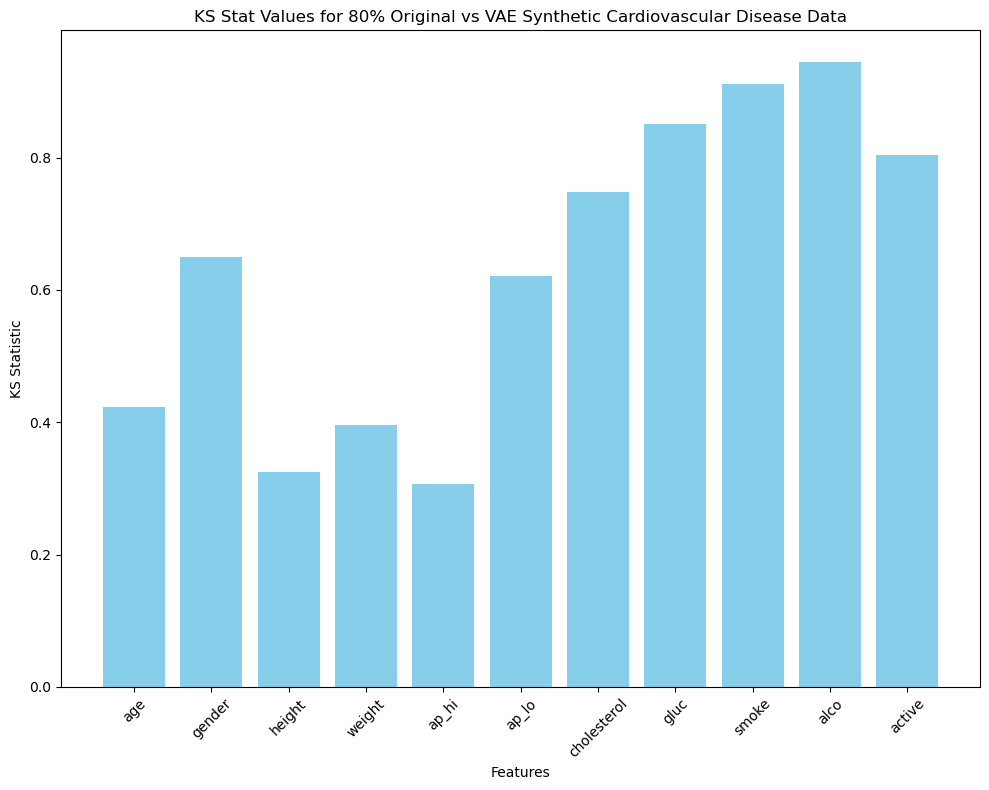

In [151]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
features = ["age", "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active"]
ks_stat = [0.423321, 0.650018, 0.324554, 0.395232, 0.306839, 0.620357, 0.748393, 0.850339, 0.911250, 0.945161, 0.803768]
f_test_stat = [2.983396, 3762.600478, 97.330783, 0.044941, 0.135108, 4.886354, 12646.419133, 32456.658245, 57672.041989, 81915.040224, 21532.619358]
t_test_p_values = [0.08412537, 0.0, 0.0005994006, 0.8321138, 0.7131946, 0.02707181, 0.0, 0.0, 0.0, 0.0, 0.0]
mse_values = [1.058117e+00, 1.016086e+09, 1.131754e+00, 1.043505e+00, 9.355585e-01, 1.109565e+00, 1.032383e+09, 1.026400e+09, 1.041199e+09, 1.035659e+09, 1.013707e+09]
rmse_values = [1.028648, 31876.104421, 1.063839, 1.021521, 0.967243, 1.053359, 32130.711567, 32037.471834, 32267.620146, 32181.649285, 31838.764597]
mae_values = [0.854079, 27541.041893, 0.826334, 0.785830, 0.127901, 0.190647, 27821.195661, 27737.962268, 27935.117554, 27866.575911, 27585.930786]

# Plotting KS Statistic
plt.figure(figsize=(10, 8))
plt.bar(features, ks_stat, color='skyblue')
plt.xlabel('Features')
plt.ylabel('KS Statistic')
plt.title('KS Stat Values for 80% Original vs VAE Synthetic Cardiovascular Disease Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


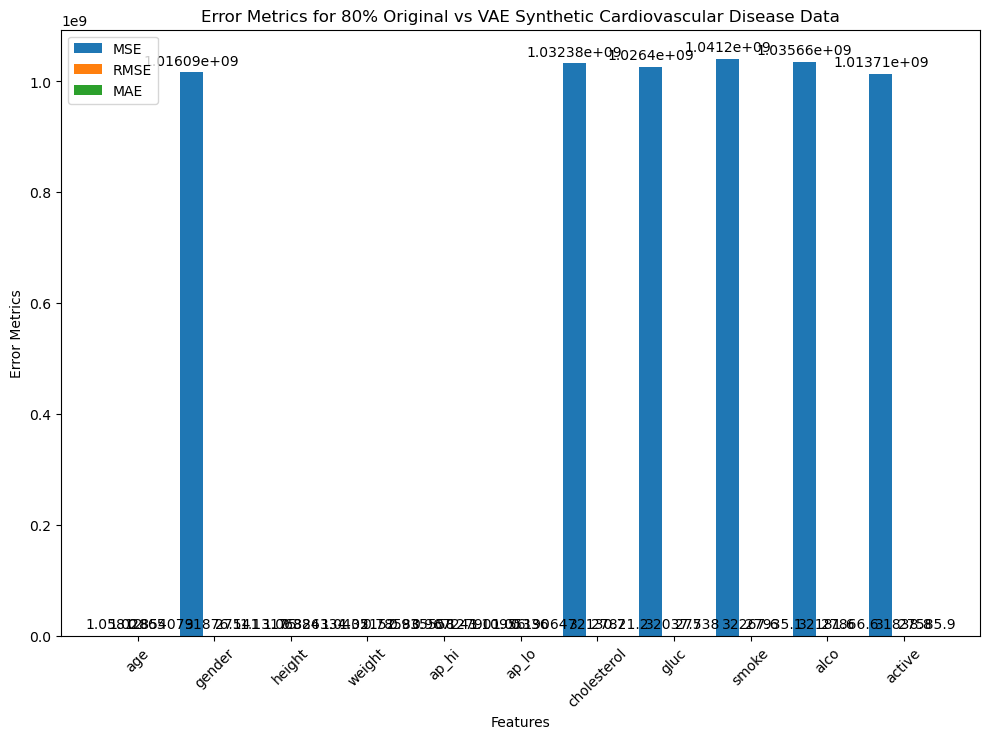

In [150]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
features = ["age", "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active"]
ks_stat = [0.423321, 0.650018, 0.324554, 0.395232, 0.306839, 0.620357, 0.748393, 0.850339, 0.911250, 0.945161, 0.803768]
f_test_stat = [2.983396, 3762.600478, 97.330783, 0.044941, 0.135108, 4.886354, 12646.419133, 32456.658245, 57672.041989, 81915.040224, 21532.619358]
t_test_p_values = [0.08412537, 0.0, 0.0005994006, 0.8321138, 0.7131946, 0.02707181, 0.0, 0.0, 0.0, 0.0, 0.0]
mse_values = [1.058117e+00, 1.016086e+09, 1.131754e+00, 1.043505e+00, 9.355585e-01, 1.109565e+00, 1.032383e+09, 1.026400e+09, 1.041199e+09, 1.035659e+09, 1.013707e+09]
rmse_values = [1.028648, 31876.104421, 1.063839, 1.021521, 0.967243, 1.053359, 32130.711567, 32037.471834, 32267.620146, 32181.649285, 31838.764597]
mae_values = [0.854079, 27541.041893, 0.826334, 0.785830, 0.127901, 0.190647, 27821.195661, 27737.962268, 27935.117554, 27866.575911, 27585.930786]


# Plotting Error Metrics (MSE, RMSE, MAE)
x = np.arange(len(features))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 7))
rects1 = ax.bar(x - width, mse_values, width, label='MSE')
rects2 = ax.bar(x, rmse_values, width, label='RMSE')
rects3 = ax.bar(x + width, mae_values, width, label='MAE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Features')
ax.set_ylabel('Error Metrics')
ax.set_title('Error Metrics for 80% Original vs VAE Synthetic Cardiovascular Disease Data')
ax.set_xticks(x)
ax.set_xticklabels(features)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()
plt.xticks(rotation=45)
plt.show()


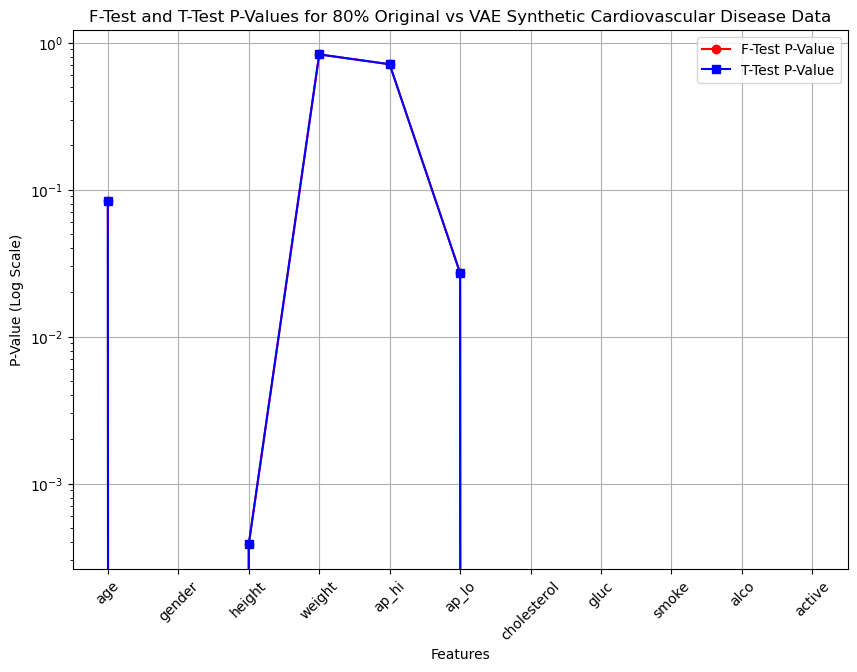

In [77]:
import matplotlib.pyplot as plt

# Extracting the correct values from the given data for the second set of tables
features = ["age", "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active"]
f_test_p_value = [0.08412537, 0.0, 0.0003853312, 0.8321138, 0.7131946, 0.02707181, 0.0, 0.0, 0.0, 0.0, 0.0]
t_test_p_value = [0.08412537, 0.0, 0.0003853312, 0.8321139, 0.7131947, 0.02707181, 0.0, 0.0, 0.0, 0.0, 0.0]

plt.figure(figsize=(10, 7))
plt.plot(features, f_test_p_value, '-o', label='F-Test P-Value', color='red')
plt.plot(features, t_test_p_value, '-s', label='T-Test P-Value', color='blue')
plt.yscale('log')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('P-Value (Log Scale)')
plt.title('F-Test and T-Test P-Values for 80% Original vs VAE Synthetic Cardiovascular Disease Data')
plt.legend()
plt.grid(True)
plt.show()


# CLASSIFICATION REPORT FOR 80% VAE SYNTHETIC AND ORIGINALCARDIOVASCULAR DISEASE DATA

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = GradientBoostingClassifier(max_depth=1000, n_estimators=1000, random_state=42)
classifier_orig.fit(X_train_orig, y_train_orig)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("GB on 80% Original Cardio/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = GradientBoostingClassifier()
classifier_syn.fit(X_train_syn_vae, y_train_syn_vae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("GB on 80% VAE SyntheticCardio/Tested on 20% Control Data (TSTR):\n", report)


GB on 80% Original Cardio/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.64      0.64      0.64      1403
           1       0.64      0.65      0.64      1397

    accuracy                           0.64      2800
   macro avg       0.64      0.64      0.64      2800
weighted avg       0.64      0.64      0.64      2800

GB on 80% VAE SyntheticCardio/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.69      0.42      0.52      1403
           1       0.58      0.82      0.68      1397

    accuracy                           0.62      2800
   macro avg       0.64      0.62      0.60      2800
weighted avg       0.64      0.62      0.60      2800




Random Forest Results:
TRTR - on 80% Original Cardio/Tested on 20% Control Data for Random Forest:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1403
           1       0.73      0.71      0.72      1397

    accuracy                           0.73      2800
   macro avg       0.73      0.73      0.73      2800
weighted avg       0.73      0.73      0.73      2800



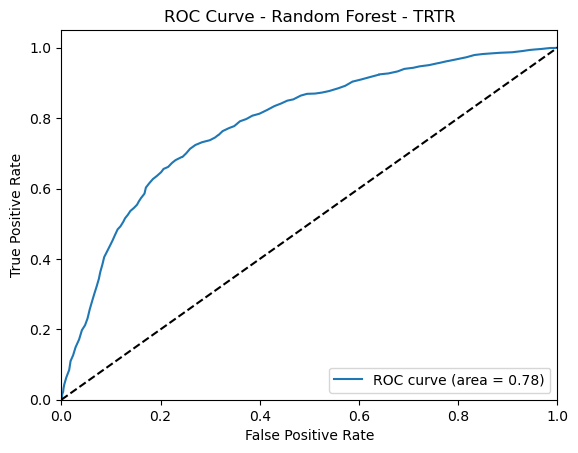

TSTR - on 80% VAE SyntheticCardio/Tested on 20% Control Data for Random Forest:
              precision    recall  f1-score   support

           0       0.63      0.55      0.59      1403
           1       0.60      0.67      0.63      1397

    accuracy                           0.61      2800
   macro avg       0.61      0.61      0.61      2800
weighted avg       0.61      0.61      0.61      2800



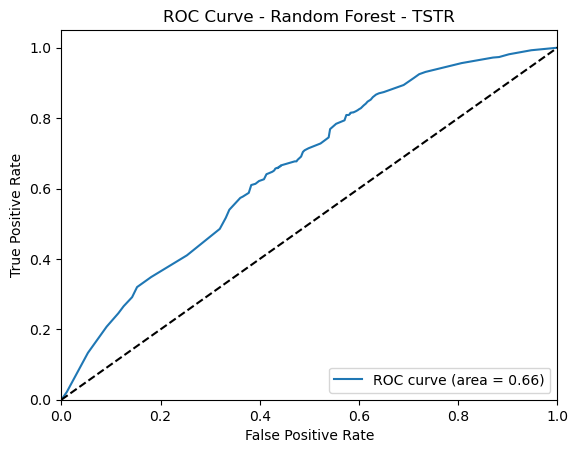


Gradient Boosting Results:
TRTR - on 80% Original Cardio/Tested on 20% Control Data for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1403
           1       0.76      0.71      0.74      1397

    accuracy                           0.74      2800
   macro avg       0.74      0.74      0.74      2800
weighted avg       0.74      0.74      0.74      2800



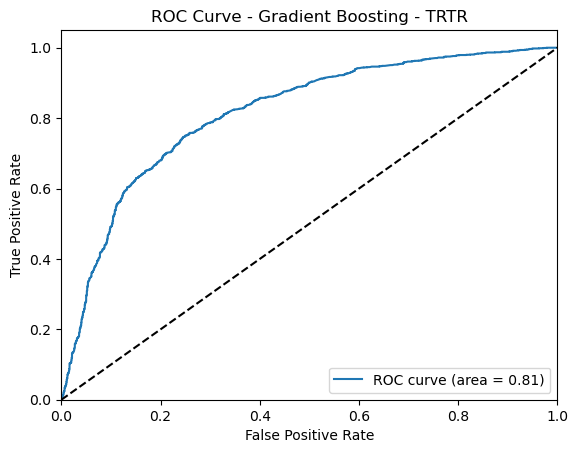

TSTR - on 80% VAE SyntheticCardio/Tested on 20% Control Data for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.69      0.42      0.52      1403
           1       0.58      0.82      0.68      1397

    accuracy                           0.62      2800
   macro avg       0.64      0.62      0.60      2800
weighted avg       0.64      0.62      0.60      2800



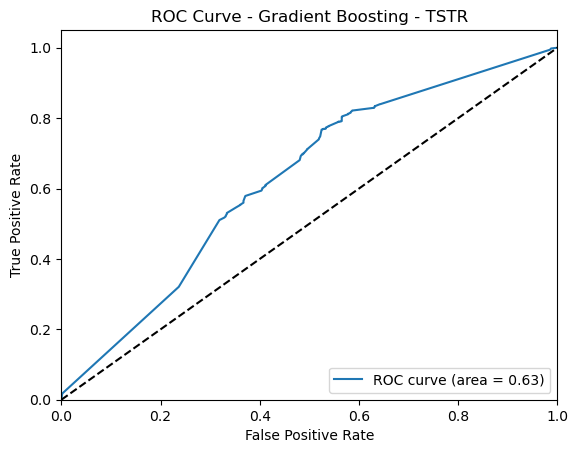


Logistic Regression Results:
TRTR - on 80% Original Cardio/Tested on 20% Control Data for Logistic Regression:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1403
           1       0.75      0.69      0.72      1397

    accuracy                           0.73      2800
   macro avg       0.73      0.73      0.73      2800
weighted avg       0.73      0.73      0.73      2800



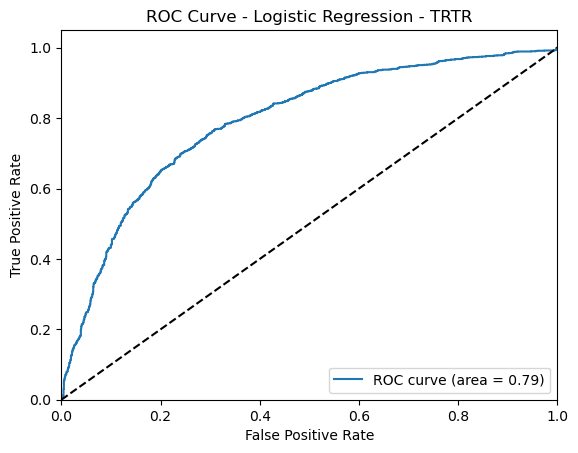

TSTR - on 80% VAE SyntheticCardio/Tested on 20% Control Data for Logistic Regression:
              precision    recall  f1-score   support

           0       0.56      0.83      0.67      1403
           1       0.67      0.35      0.45      1397

    accuracy                           0.59      2800
   macro avg       0.61      0.59      0.56      2800
weighted avg       0.61      0.59      0.56      2800



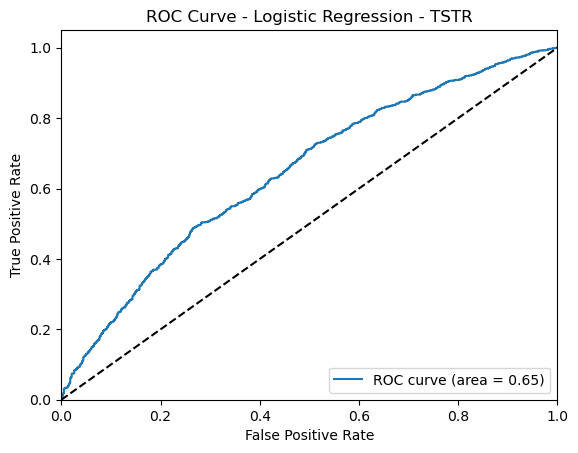


SVC Results:
TRTR - on 80% Original Cardio/Tested on 20% Control Data for SVC:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1403
           1       0.75      0.71      0.73      1397

    accuracy                           0.74      2800
   macro avg       0.74      0.74      0.74      2800
weighted avg       0.74      0.74      0.74      2800



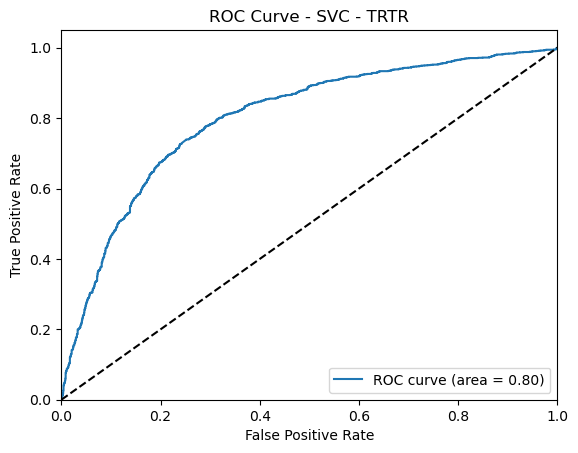

TSTR - on 80% VAE SyntheticCardio/Tested on 20% Control Data for SVC:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1403
           1       0.50      1.00      0.67      1397

    accuracy                           0.50      2800
   macro avg       0.25      0.50      0.33      2800
weighted avg       0.25      0.50      0.33      2800



C:\Users\Ede\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


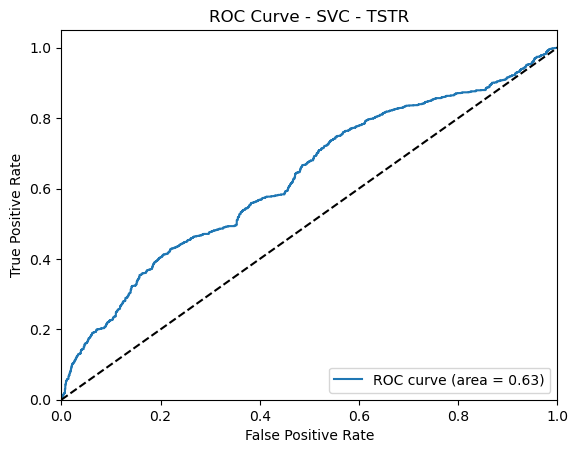


MLPClassifier Results:
TRTR - on 80% Original Cardio/Tested on 20% Control Data for MLPClassifier:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1403
           1       0.76      0.72      0.74      1397

    accuracy                           0.75      2800
   macro avg       0.75      0.75      0.75      2800
weighted avg       0.75      0.75      0.75      2800



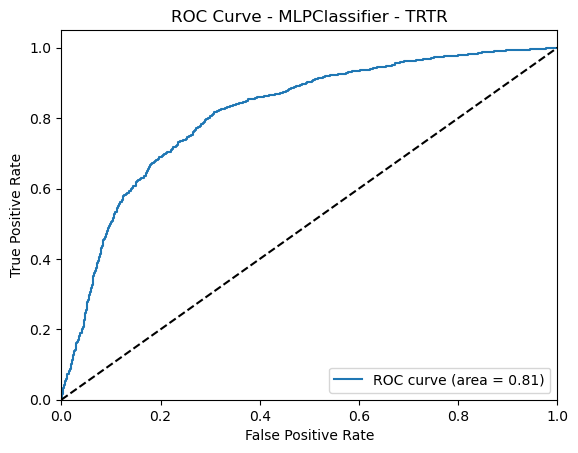

TSTR - on 80% VAE SyntheticCardio/Tested on 20% Control Data for MLPClassifier:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1403
           1       0.65      0.64      0.64      1397

    accuracy                           0.65      2800
   macro avg       0.65      0.65      0.65      2800
weighted avg       0.65      0.65      0.65      2800



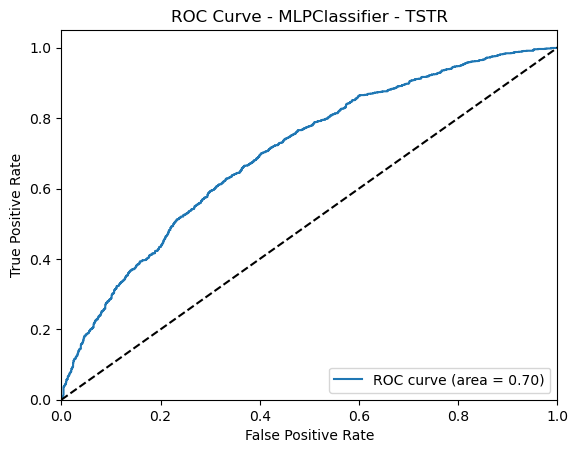


K-Nearest Neighbors Results:
TRTR - on 80% Original Cardio/Tested on 20% Control Data for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.67      0.68      0.68      1403
           1       0.67      0.66      0.67      1397

    accuracy                           0.67      2800
   macro avg       0.67      0.67      0.67      2800
weighted avg       0.67      0.67      0.67      2800



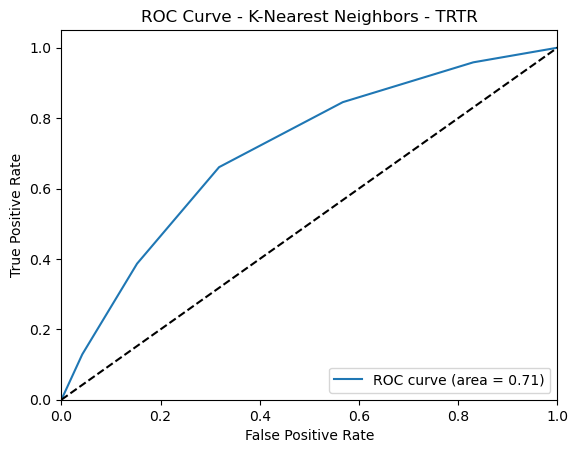

TSTR - on 80% VAE SyntheticCardio/Tested on 20% Control Data for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1403
           1       0.50      1.00      0.67      1397

    accuracy                           0.50      2800
   macro avg       0.25      0.50      0.33      2800
weighted avg       0.25      0.50      0.33      2800



C:\Users\Ede\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


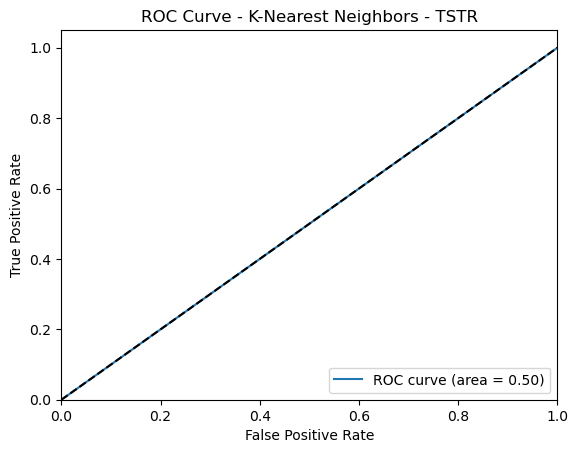


XGBClassifier Results:


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:gender: category, cholesterol: category, gluc: category, smoke: category, alco: category, active: category

In [87]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

# Assuming the classes are represented as integers starting from 0
def plot_binary_roc_curve(y_true, y_score, title):
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {title}')
    plt.legend(loc="lower right")
    plt.show()

# Define classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVC": SVC(probability=True),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "ADA Boost": AdaBoostClassifier()
}

for name, clf in classifiers.items():
    print(f"\n{name} Results:")

    # Train on real, test on real
    clf.fit(X_train_orig, y_train_orig)
    y_pred_proba_trtr = clf.predict_proba(X_test_cont)[:, 1]  # Use probabilities of the positive class
    print(f"TRTR - on 80% Original Cardio/Tested on 20% Control Data for {name}:")
    print(classification_report(y_test_cont, clf.predict(X_test_cont)))
    plot_binary_roc_curve(y_test_cont, y_pred_proba_trtr, f"{name} - TRTR")

    # Train on synthetic, test on real
    clf.fit(X_train_syn_vae, y_train_syn_vae)
    y_pred_proba_tstr = clf.predict_proba(X_test_cont)[:, 1]
    print(f"TSTR - on 80% VAE SyntheticCardio/Tested on 20% Control Data for {name}:")
    print(classification_report(y_test_cont, clf.predict(X_test_cont)))
    plot_binary_roc_curve(y_test_cont, y_pred_proba_tstr, f"{name} - TSTR")


# CORRELATION MATRIX FOR ORIGINAL AND VAE SYNTHETIC CARDIOVASCULAR DISEASE

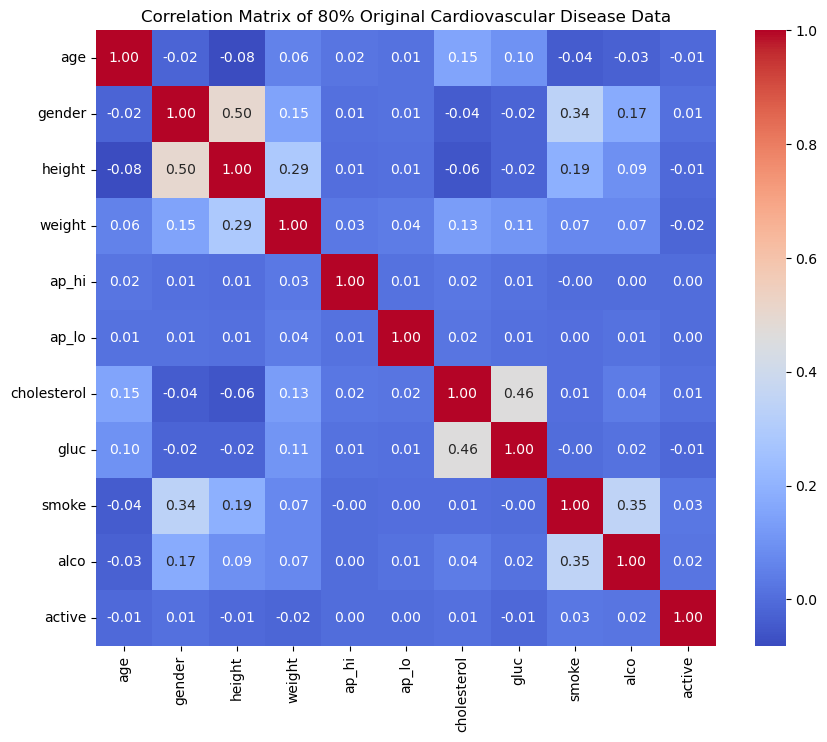

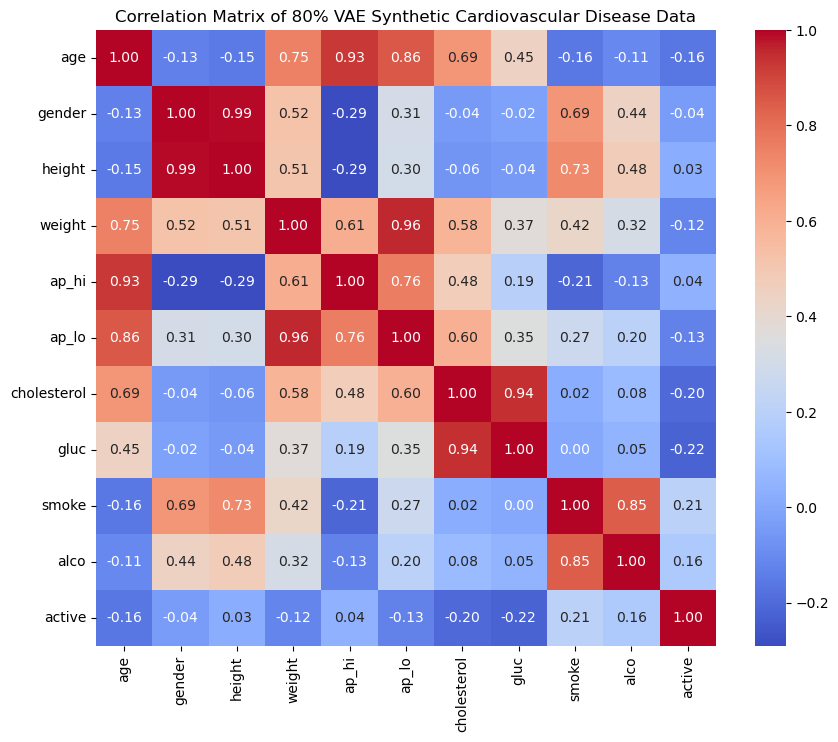

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

columns = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

def plot_correlation_matrix(data, title):
    # Calculate the correlation matrix
    corr_matrix = data.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(title)
    plt.show()

    
    
# Assuming 'columns' is a list of column names for your original dataset
X_train_orig_df = pd.DataFrame(X_train_orig_scaled, columns=columns)

# Plot correlation matrix for original data
plot_correlation_matrix(X_train_orig_df, "Correlation Matrix of 80% Original Cardiovascular Disease Data")

# Plot correlation matrix for synthetic data   ae_synthetic_data_df
plot_correlation_matrix(vae_synthetic_data_df, "Correlation Matrix of 80% VAE Synthetic Cardiovascular Disease Data")


# Computing Numerical Correlation Matrices of Original and Synthetic Datasets

In [144]:
# For the original dataset
print('80% Original Cardiovascular Disease Numerical Correlation Matrix:')
print(X_train_orig_df.corr())

# For the AE synthetic dataset
print('80% VAE-Synthetic Cardiovascular Disease Numerical Correlation Matrix:')
print(vae_synthetic_data_df.corr())

80% Original Cardiovascular Disease Numerical Correlation Matrix:
                  age    gender    height    weight     ap_hi     ap_lo  \
age          1.000000 -0.020278 -0.081830  0.056823  0.021680  0.014829   
gender      -0.020278  1.000000  0.499212  0.149952  0.009822  0.013883   
height      -0.081830  0.499212  1.000000  0.288823  0.006378  0.008180   
weight       0.056823  0.149952  0.288823  1.000000  0.031023  0.039502   
ap_hi        0.021680  0.009822  0.006378  0.031023  1.000000  0.014467   
ap_lo        0.014829  0.013883  0.008180  0.039502  0.014467  1.000000   
cholesterol  0.152158 -0.040235 -0.056692  0.133434  0.024208  0.022338   
gluc         0.098642 -0.020276 -0.019545  0.105221  0.012083  0.010565   
smoke       -0.039929  0.339518  0.188967  0.070610 -0.000748  0.003986   
alco        -0.027936  0.174355  0.093014  0.071846  0.001241  0.011548   
active      -0.009441  0.008349 -0.009704 -0.018160  0.001909  0.002647   

             cholesterol      glu

# BAR GRAPH AND SCATTER PLOTS FOR RESULTS FROM CORRELATION MATRIX

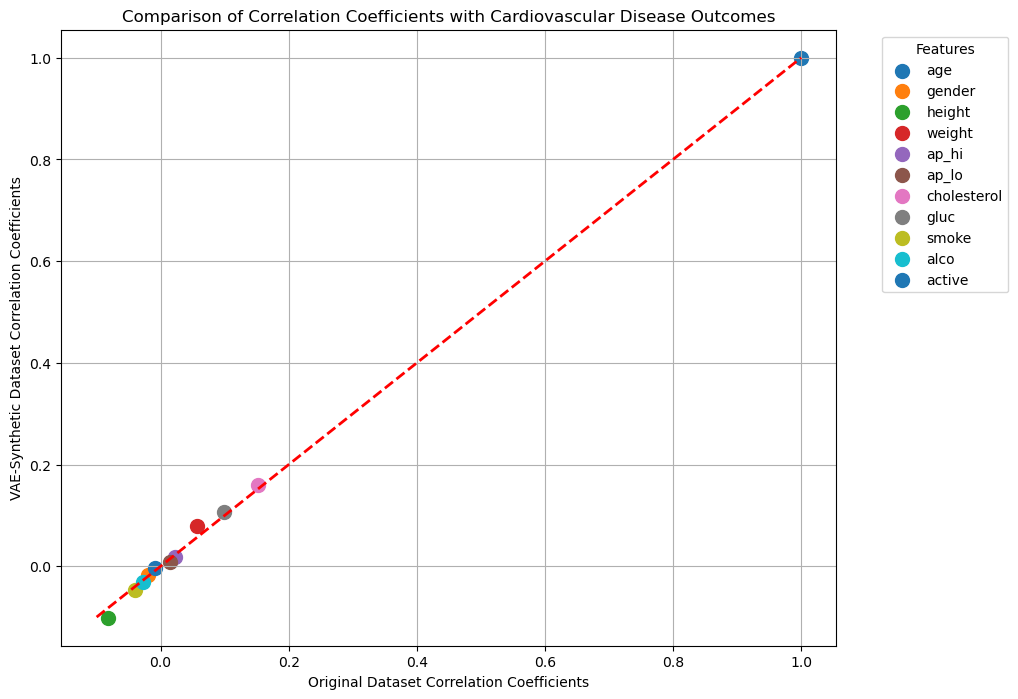

In [146]:
import matplotlib.pyplot as plt

# Data for plotting
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
orig_corrs = [1.000000, -0.020278, -0.081830, 0.056823, 0.021680, 0.014829, 0.152158, 0.098642, -0.039929, -0.027936, -0.009441]
synth_corrs = [1.000000, -0.017644, -0.101292, 0.078357, 0.018710, 0.008929, 0.158945, 0.106886, -0.047740, -0.030279, -0.003264]

# Plotting scatter plot for comparison of correlation coefficients
plt.figure(figsize=(10, 8))
for i, feature in enumerate(features):
    plt.scatter(orig_corrs[i], synth_corrs[i], label=f'{feature}', s=100)

# Plotting a line for perfect agreement
plt.plot([-0.1, 1.0], [-0.1, 1.0], 'r--', lw=2)

plt.title('Comparison of Correlation Coefficients with Cardiovascular Disease Outcomes')
plt.xlabel('Original Dataset Correlation Coefficients')
plt.ylabel('VAE-Synthetic Dataset Correlation Coefficients')
plt.legend(title="Features", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


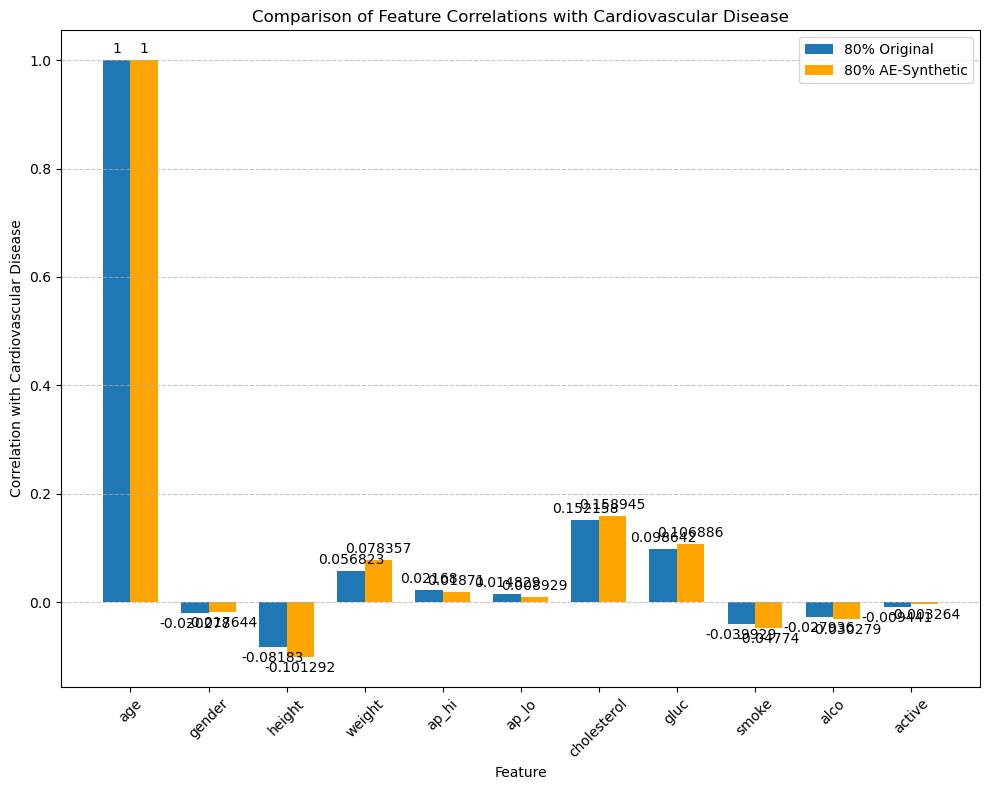

In [149]:
import matplotlib.pyplot as plt
import numpy as np

# Example features to compare
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
# Original data correlations
orig_corrs = [1.00, -0.020278, -0.081830, 0.056823, 0.021680, 0.014829, 0.152158, 0.098642, -0.039929, -0.027936, -0.009441]
# Synthetic data correlations
synth_corrs = [1.00, -0.017644, -0.101292, 0.078357, 0.018710, 0.008929, 0.158945, 0.106886, -0.047740, -0.030279, -0.003264]

x = np.arange(len(features))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 8))
rects1 = ax.bar(x - width/2, orig_corrs, width, label='80% Original')
rects2 = ax.bar(x + width/2, synth_corrs, width, label='80% AE-Synthetic', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Feature')
ax.set_ylabel('Correlation with Cardiovascular Disease')
ax.set_title('Comparison of Feature Correlations with Cardiovascular Disease')
ax.set_xticks(x)
ax.set_xticklabels(features)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# INSTALL THE PRIVACY ASSESSMENT TOOL KITS KNOWN AS ANONYMETER AS MENTIONED ABOVE IN STEP 2

In [ ]:
!pip install anonymeter

# IMPORTING THE INSTALLED ANONYMETER'S PRIVACY RISK EVALUATORS FOR PRIVACY PRESERVATION ASSESSMENT ON THE GENERATED SYNTHETIC DATASET
For more detailed information on the usage of this tool do visit the author's website(blogger) via the links below.

https://www.anonos.com/blog/presenting-anonymeter-the-tool-for-assessing-privacy-risks-in-synthetic-datasets

https://github.com/statice/anonymeter

In [183]:
import pandas as pd
from anonymeter.evaluators import SinglingOutEvaluator, LinkabilityEvaluator, InferenceEvaluator

In [182]:
# Convert float32 columns to float64 in the synthetic dataset
float_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
vae_synthetic_cardio_data_labels_df_newest[float_cols] =vae_synthetic_cardio_data_labels_df_newest[float_cols].astype('float64')

# Convert categorical columns back to category in the synthetic dataset
category_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
for col in category_cols:
    # It's important to ensure the category mappings are consistent across datasets
    vae_synthetic_cardio_data_labels_df_newest[col] = vae_synthetic_cardio_data_labels_df_newest[col].astype('category')

# Now, check the info again to ensure the conversion is successful
vae_synthetic_cardio_data_labels_df_newest.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          56000 non-null  float64 
 1   gender       56000 non-null  category
 2   height       56000 non-null  float64 
 3   weight       56000 non-null  float64 
 4   ap_hi        56000 non-null  float64 
 5   ap_lo        56000 non-null  float64 
 6   cholesterol  56000 non-null  category
 7   gluc         56000 non-null  category
 8   smoke        56000 non-null  category
 9   alco         56000 non-null  category
 10  active       56000 non-null  category
 11  cardio       56000 non-null  category
dtypes: category(7), float64(5)
memory usage: 18.1 MB


# STEP 3A: PRIVACY RISK ASSESSMENT VIA UNIVARIATE MODE ON 80% AE-SYNTHETIC CARDIO DISEASE DATASET

In [58]:
singling_outV = SinglingOutEvaluator(ori=cardiovascular_train_dataframe, 
                                              syn=vae_synthetic_cardio_data_labels_df, 
                                              control=control_cardio_dataframe,
                                              n_attacks=1500)

try:
    singling_outV.evaluate(mode='univariate')  # For univariate analysis
    # For multivariate analysis, you can change mode to 'multivariate'
    singling_out_risk = singling_outV.risk()
    print("Singling Out Risk Type via Univariate Analysis When n_attacks=1500 for VAE Synthetc Cardiovascular Data:", singling_out_risk)
except RuntimeError as ex:
    print(f"Singling out evaluation failed: {ex}")

Singling Out Risk Type via Univariate Analysis When n_attacks=1500 for VAE Synthetc Cardiovascular Data: PrivacyRisk(value=0.0, ci=(0.0, 0.0018085652115795217))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.001277215360090744, baseline = 0.001277215360090744. Analysis results cannot be trusted.
  self._sanity_check()


In [59]:
res = singling_outV.results()

print("The Singling Out Risk Type via Univariate Analysis When n_attacks=1500 for AE Synthetc Cardiovascular Data:")
print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

The Singling Out Risk Type via Univariate Analysis When n_attacks=1500 for AE Synthetc Cardiovascular Data:
Successs rate of main attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)
Successs rate of baseline attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)
Successs rate of control attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)


In [60]:
singling_outV1 = SinglingOutEvaluator(ori=cardiovascular_train_dataframe, 
                                              syn=vae_synthetic_cardio_data_labels_df, 
                                              control=control_cardio_dataframe,
                                              n_attacks=500)

try:
    singling_outV1.evaluate(mode='univariate')  # For univariate analysis
    # For multivariate analysis, you can change mode to 'multivariate'
    singling_out_risk = singling_outV1.risk()
    print("Singling Out Risk Type via Univariate Analysis When n_attacks=500 for VAE Synthetc Cardiovascular Data:", singling_out_risk)
except RuntimeError as ex:
    print(f"Singling out evaluation failed: {ex}")

Singling Out Risk Type via Univariate Analysis When n_attacks=500 for VAE Synthetc Cardiovascular Data: PrivacyRisk(value=0.0, ci=(0.0, 0.005411853750198381))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.0038121702307761206, baseline = 0.0038121702307761206. Analysis results cannot be trusted.
  self._sanity_check()


In [157]:
res = singling_outV1.results()

print("The Singling Out Risk Type via Univariate Analysis When n_attacks=500 for AE Synthetc Cardiovascular Data:")
print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

The Singling Out Risk Type via Univariate Analysis When n_attacks=500 for AE Synthetc Cardiovascular Data:
Successs rate of main attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)
Successs rate of baseline attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)
Successs rate of control attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

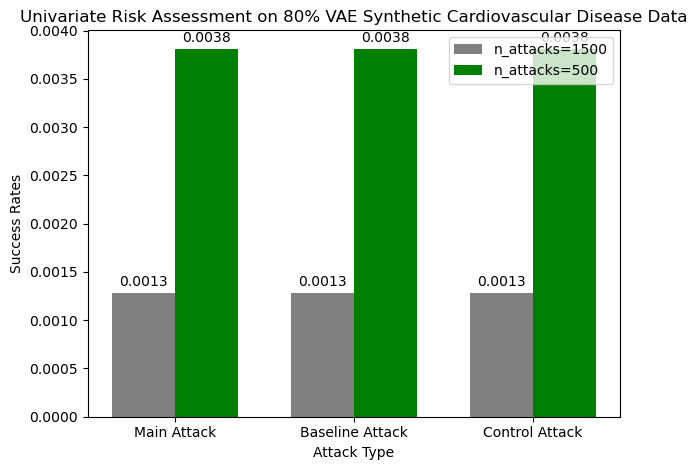

In [165]:
import matplotlib.pyplot as plt

# Data from the attacks
attacks = ["Main Attack", "Baseline Attack", "Control Attack"]
success_rates_1500 = [0.001277215, 0.001277215, 0.001277215]
success_rates_500 = [0.003812170, 0.003812170, 0.003812170]

# Bar Chart
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(attacks))

bar1 = ax.bar(index, success_rates_1500, bar_width, label='n_attacks=1500', color='grey')
bar2 = ax.bar([p + bar_width for p in index], success_rates_500, bar_width, label='n_attacks=500', color='green')

# Success Rates by Attack Type and Number of Attacks
ax.set_xlabel('Attack Type')
ax.set_ylabel('Success Rates')
ax.set_title('Univariate Risk Assessment on 80% VAE Synthetic Cardiovascular Disease Data')
ax.set_xticks([p + bar_width/2 for p in index])
ax.set_xticklabels(attacks)
ax.legend()

ax.bar_label(bar1, padding=3, fmt='%.4f')
ax.bar_label(bar2, padding=3, fmt='%.4f')

plt.tight_layout()
plt.show()
# figsize=(10, 6)

Univariate Risk Assessment Success vs. Failure Rates via 1500 and 500 Attacks on 80% VAE Synthetic Cardiovascular Disease


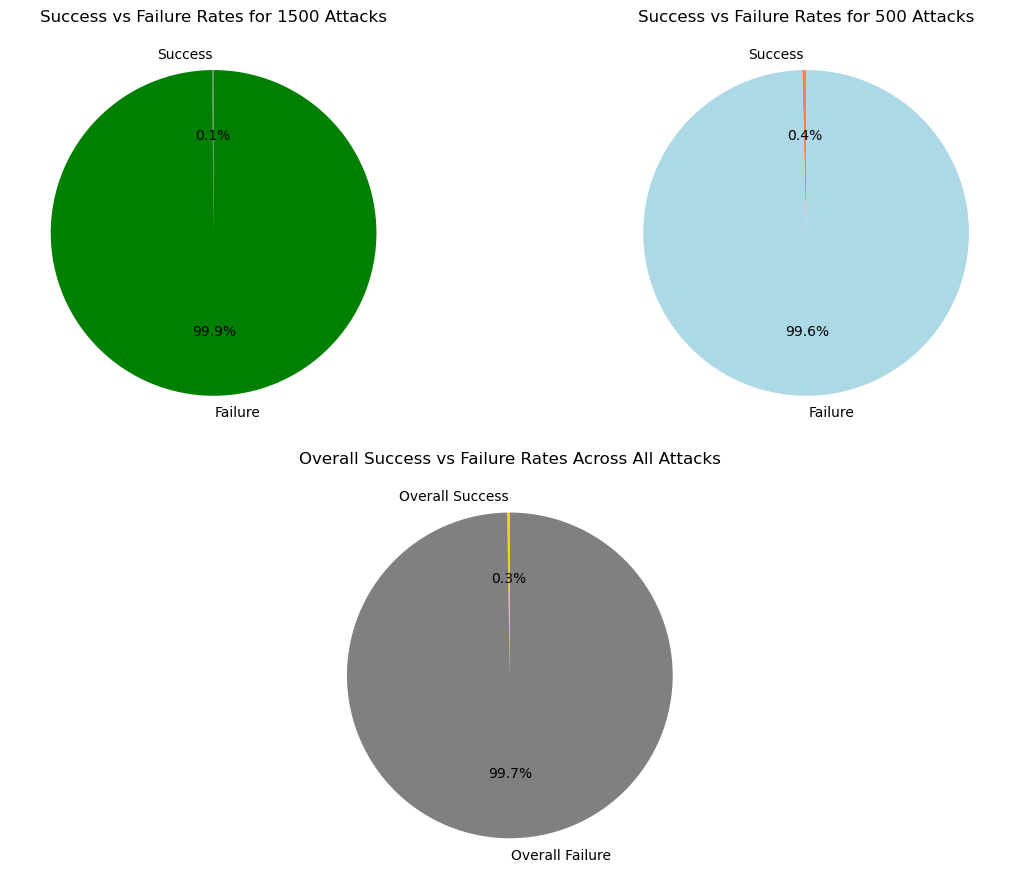

In [170]:
import matplotlib.pyplot as plt

print('Univariate Risk Assessment Success vs. Failure Rates via 1500 and 500 Attacks on 80% VAE Synthetic Cardiovascular Disease')

# Data for 1500 attacks
success_rate_1500 = 0.001277215360090744
failure_rate_1500 = 1 - success_rate_1500

# Data for 500 attacks     
success_rate_500 = 0.0038121702307761206
failure_rate_500 = 1 - success_rate_500

# Overall success rate considering all attacks
overall_success_rate = (success_rate_1500 + success_rate_500) / 2
overall_failure_rate = 1 - overall_success_rate

# Custom colors
colors_1500 = ['grey', 'green']  # Custom colors for the 1500 attacks chart
colors_500 = ['coral', 'lightblue']  # Custom colors for the 500 attacks chart
overall_colors = ['gold', 'grey']  # Custom colors for the overall chart

# Pie chart for 1500 attacks
plt.figure(figsize=(12, 9))
plt.subplot(2, 2, 1)
plt.pie([success_rate_1500, failure_rate_1500], labels=['Success', 'Failure'], autopct='%1.1f%%', startangle=90, colors=colors_1500)
plt.title('Success vs Failure Rates for 1500 Attacks')

# Pie chart for 500 attacks
plt.subplot(2, 2, 2)
plt.pie([success_rate_500, failure_rate_500], labels=['Success', 'Failure'], autopct='%1.1f%%', startangle=90, colors=colors_500)
plt.title('Success vs Failure Rates for 500 Attacks')

# Overall pie chart
plt.subplot(2, 1, 2)
plt.pie([overall_success_rate, overall_failure_rate], labels=['Overall Success', 'Overall Failure'], autopct='%1.1f%%', startangle=90, colors=overall_colors)
plt.title('Overall Success vs Failure Rates Across All Attacks')

plt.tight_layout()
plt.show()


# STEP 3B: PRIVACY RISK ASSESSMENT VIA MULTIVARIATE MODE ON 80% VAE-SYNTHETIC CARDIO DISEASE DATASET

In [61]:
singling_outV2 = SinglingOutEvaluator(ori=cardiovascular_train_dataframe, 
                                              syn=vae_synthetic_cardio_data_labels_df, 
                                              control=control_cardio_dataframe,
                                              n_attacks=1500)

try:
    singling_outV2.evaluate(mode='multivariate')  # For univariate analysis
    # For multivariate analysis, you can change mode to 'multivariate'
    singling_out_risk = singling_outV2.risk()
    print("Singling Out Risk Type via Multivariate Analysis When n_attacks=1500 for VAE Synthetc Cardiovascular Data:", singling_out_risk)
except RuntimeError as ex:
    print(f"Singling out evaluation failed: {ex}")

Singling Out Risk Type via Multivariate Analysis When n_attacks=1500 for VAE Synthetc Cardiovascular Data: PrivacyRisk(value=0.0, ci=(0.0, 0.0018085652115795217))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.001277215360090744, baseline = 0.001277215360090744. Analysis results cannot be trusted.
  self._sanity_check()


In [62]:
res = singling_outV2.results()

print("The Singling Out Risk Type via Multivariate Analysis When n_attacks=1500 for VAE Synthetc Cardiovascular Data:")
print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

The Singling Out Risk Type via Multivariate Analysis When n_attacks=1500 for VAE Synthetc Cardiovascular Data:
Successs rate of main attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)
Successs rate of baseline attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)
Successs rate of control attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)


In [63]:
singling_outV3 = SinglingOutEvaluator(ori=cardiovascular_train_dataframe, 
                                              syn=vae_synthetic_cardio_data_labels_df, 
                                              control=control_cardio_dataframe,
                                              n_attacks=500)

try:
    singling_outV3.evaluate(mode='multivariate')  # For univariate analysis
    # For multivariate analysis, you can change mode to 'multivariate'
    singling_out_risk = singling_outV3.risk()
    print("Singling Out Risk Type via Multivariate Analysis When n_attacks=500 for VAE Synthetc Cardiovascular Data:", singling_out_risk)
except RuntimeError as ex:
    print(f"Singling out evaluation failed: {ex}")

Singling Out Risk Type via Multivariate Analysis When n_attacks=500 for VAE Synthetc Cardiovascular Data: PrivacyRisk(value=0.0, ci=(0.0, 0.005411853750198381))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.0038121702307761206, baseline = 0.0038121702307761206. Analysis results cannot be trusted.
  self._sanity_check()


In [64]:
res = singling_outV3.results()

print("The Singling Out Risk Type via Multivariate Analysis When n_attacks=500 for VAE Synthetc Cardiovascular Data:")
print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

The Singling Out Risk Type via Multivariate Analysis When n_attacks=500 for VAE Synthetc Cardiovascular Data:
Successs rate of main attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)
Successs rate of baseline attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)
Successs rate of control attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

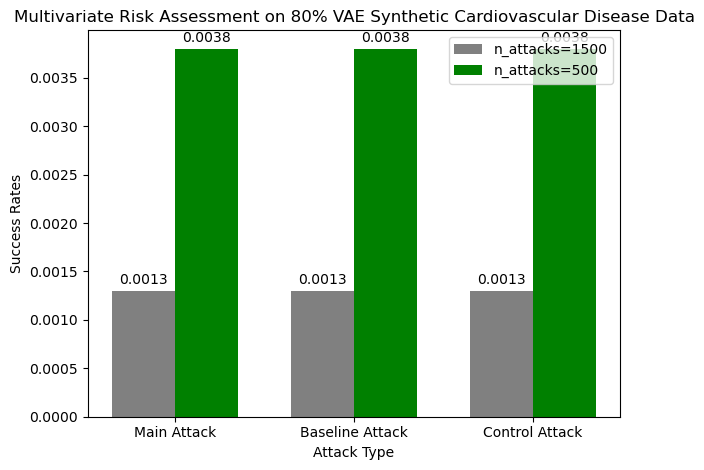

In [174]:
import matplotlib.pyplot as plt

# Data from the attacks
attacks = ["Main Attack", "Baseline Attack", "Control Attack"]
success_rates_1500 = [0.0013, 0.0013, 0.0013]
success_rates_500 = [0.0038, 0.0038, 0.0038]

# Pie Chart Data
total_success_1500 = sum(success_rates_1500)
total_failure_1500 = len(success_rates_1500) - total_success_1500
total_success_500 = sum(success_rates_500)
total_failure_500 = len(success_rates_500) - total_success_500

# Bar Chart
fig, ax = plt.subplots() # figsize=(14, 7)
bar_width = 0.35
index = range(len(attacks))

bar1 = ax.bar(index, success_rates_1500, bar_width, label='n_attacks=1500', color='grey')
bar2 = ax.bar([p + bar_width for p in index], success_rates_500, bar_width, label='n_attacks=500', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Attack Type')
ax.set_ylabel('Success Rates')
ax.set_title('Multivariate Risk Assessment on 80% VAE Synthetic Cardiovascular Disease Data')
ax.set_xticks([p + bar_width/2 for p in index])
ax.set_xticklabels(attacks)
ax.legend()

ax.bar_label(bar1, padding=3, fmt='%.4f')
ax.bar_label(bar2, padding=3, fmt='%.4f')

plt.tight_layout()
plt.show()

Multivariate Risk Assessment Success vs. Failure Rates via 1500 and 500 Attacks on 80% VAE Synthetic Cardiovascular Disease


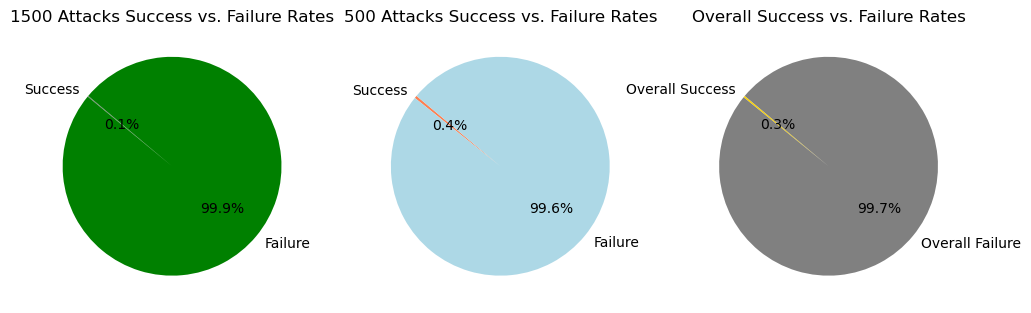

In [173]:
import matplotlib.pyplot as plt

# Data from the attacks
attacks = ["Main Attack", "Baseline Attack", "Control Attack"]
success_rates_1500 = [0.0013, 0.0013, 0.0013]
success_rates_500 = [0.0038, 0.0038, 0.0038]

# Pie Chart Data
total_success_1500 = sum(success_rates_1500)
total_failure_1500 = len(success_rates_1500) - total_success_1500
total_success_500 = sum(success_rates_500)
total_failure_500 = len(success_rates_500) - total_success_500

# Defining colors for each pie chart
colors_1500 = ['grey', 'green']  # Custom colors for the 1500 attacks chart
colors_500 = ['coral', 'lightblue']  # Custom colors for the 500 attacks chart
overall_colors = ['gold', 'gray']  # Custom colors for the overall chart

print('Multivariate Risk Assessment Success vs. Failure Rates via 1500 and 500 Attacks on 80% VAE Synthetic Cardiovascular Disease')

# Pie Charts
fig, axs = plt.subplots(1, 3, figsize=(12, 8))

# Pie chart for 1500 attacks
labels = ['Success', 'Failure']
# colors = ['lightblue', 'lightcoral']  # Customizable color variables
axs[0].pie([total_success_1500, total_failure_1500], labels=labels, colors=colors_1500, autopct='%1.1f%%', startangle=140)
axs[0].set_title('1500 Attacks Success vs. Failure Rates')

# Pie chart for 500 attacks
axs[1].pie([total_success_500, total_failure_500], labels=labels, colors=colors_500, autopct='%1.1f%%', startangle=140)
axs[1].set_title('500 Attacks Success vs. Failure Rates')

# Overall success vs failure rates
overall_success = (total_success_1500 + total_success_500) / 2
overall_failure = (total_failure_1500 + total_failure_500) / 2
axs[2].pie([overall_success, overall_failure], labels=['Overall Success', 'Overall Failure'], colors=overall_colors, autopct='%1.1f%%', startangle=140)
axs[2].set_title('Overall Success vs. Failure Rates')

plt.show()


# STEP 4: PRIVACY RISK ASSESSMENT VIA LINKABILITY ON 80% VAE-SYNTHETIC CARDIO DISEASE DATASET

In [184]:
# Dynamically setting n_attacks based on the smallest dataset size
# Assuming you have similar datasets for original and control in the context of cardiovascular data
min_dataset_size = min(len(cardiovascular_train_dataframe), len(vae_synthetic_cardio_data_labels_df_newest), len(control_cardio_dataframe))
n_attacks = min_dataset_size  # Or some fraction of the smallest size, if desired

# Choosing appropriate columns based on your ae_synthetic_cardio_data_labels_df information
aux_cols = [
    ['gender', 'smoke'],  # Attributes in dataset A
    ['age', 'cholesterol']  # Attributes in dataset B
]

linkability_evalat = LinkabilityEvaluator(ori=cardiovascular_train_dataframe, 
                                              syn=vae_synthetic_cardio_data_labels_df_newest, 
                                              control=control_cardio_dataframe,
                                              n_attacks=n_attacks,
                                              aux_cols=aux_cols,
                                              n_neighbors=10)

linkability_evalat.evaluate(n_jobs=-1)  # Adjust 'n_jobs' as needed
linkability_risk1 = linkability_evalat.risk()
print("Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 10 for VAE Synthetic Cardiovascular Data:", linkability_risk1)


Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 10 for VAE Synthetic Cardiovascular Data: PrivacyRisk(value=0.0003572980079479614, ci=(0.0, 0.0010274981222231036))


In [185]:
link = linkability_evalat.results()

print("Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 10 for VAE Synthetic Cardiovascular Data:", linkability_risk1)
print("Successs rate of main attack:", link.attack_rate)
print("Successs rate of baseline attack:", link.baseline_rate)
print("Successs rate of control attack:", link.control_rate)

Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 10 for VAE Synthetic Cardiovascular Data: PrivacyRisk(value=0.0003572980079479614, ci=(0.0, 0.0010274981222231036))
Successs rate of main attack: SuccessRate(value=0.001065474031123713, error=0.0005227107607886889)
Successs rate of baseline attack: SuccessRate(value=0.0008512470985479826, error=0.00046320351640078035)
Successs rate of control attack: SuccessRate(value=0.0007084291434974956, error=0.0004188446146737431)


In [186]:
# Dynamically setting n_attacks based on the smallest dataset size
# Assuming you have similar datasets for original and control in the context of cardiovascular data
min_dataset_size = min(len(cardiovascular_train_dataframe), len(vae_synthetic_cardio_data_labels_df_newest), len(control_cardio_dataframe))
n_attacks = min_dataset_size  # Or some fraction of the smallest size, if desired

# Choosing appropriate columns based on your ae_synthetic_cardio_data_labels_df information
aux_cols = [
    ['gender', 'smoke'],  # Attributes in dataset A
    ['age', 'cholesterol']  # Attributes in dataset B
]

linkability_evalat2 = LinkabilityEvaluator(ori=cardiovascular_train_dataframe, 
                                              syn=vae_synthetic_cardio_data_labels_df_newest, 
                                              control=control_cardio_dataframe,
                                              n_attacks=n_attacks,
                                              aux_cols=aux_cols,
                                              n_neighbors=5)

linkability_evalat2.evaluate(n_jobs=-1)  # Adjust 'n_jobs' as needed
linkability_risk1 = linkability_evalat2.risk()
print("Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 5 for VAE Synthetic Cardiovascular Data:", linkability_risk1)


Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 5 for VAE Synthetic Cardiovascular Data: PrivacyRisk(value=0.0001428681566714067, ci=(0.0, 0.0005837755734187511))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.0004942022109217651, baseline = 0.0005656111884470086. Analysis results cannot be trusted.
  self._sanity_check()


In [188]:
link = linkability_evalat2.results()

print("Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 5 for VAE Synthetic Cardiovascular Data:", linkability_risk1)
print("Successs rate of main attack:", link.attack_rate)
print("Successs rate of baseline attack:", link.baseline_rate)
print("Successs rate of control attack:", link.control_rate)

Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 5 for VAE Synthetic Cardiovascular Data: PrivacyRisk(value=0.0001428681566714067, ci=(0.0, 0.0005837755734187511))
Successs rate of main attack: SuccessRate(value=0.0004942022109217651, error=0.0003416427871108698)
Successs rate of baseline attack: SuccessRate(value=0.0005656111884470086, error=0.0003691787255944275)
Successs rate of control attack: SuccessRate(value=0.00035138425587127805, error=0.00027850515975109665)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

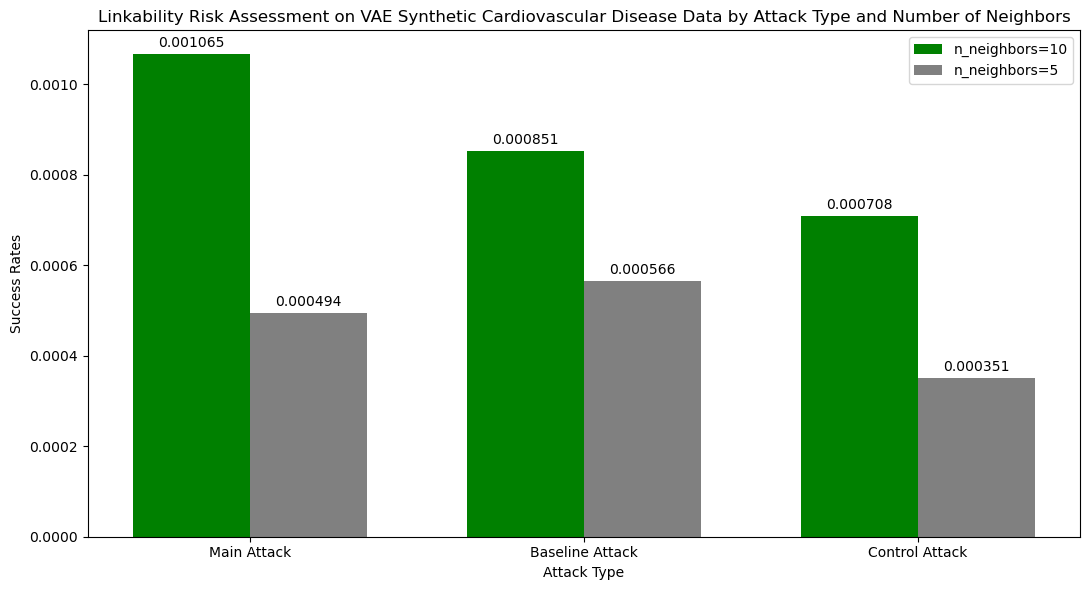

In [195]:
import matplotlib.pyplot as plt

# Corrected data for the attacks
attacks = ["Main Attack", "Baseline Attack", "Control Attack"]
success_rates_10_neighbors = [0.001065474031123713, 0.0008512470985479826, 0.0007084291434974956]
success_rates_5_neighbors = [0.0004942022109217651, 0.0005656111884470086, 0.00035138425587127805]

# Bar Chart
fig, ax = plt.subplots(figsize=(11, 6))
bar_width = 0.35
index = range(len(attacks))

bar1 = ax.bar(index, success_rates_10_neighbors, bar_width, label='n_neighbors=10', color='green')
bar2 = ax.bar([p + bar_width for p in index], success_rates_5_neighbors, bar_width, label='n_neighbors=5', color='grey')

# Success Rates by Attack Type and Number of Attacks
ax.set_xlabel('Attack Type')
ax.set_ylabel('Success Rates')
ax.set_title('Linkability Risk Assessment on VAE Synthetic Cardiovascular Disease Data by Attack Type and Number of Neighbors')
ax.set_xticks([p + bar_width/2 for p in index])
ax.set_xticklabels(attacks)
ax.legend()

ax.bar_label(bar1, padding=3, fmt='%.6f')
ax.bar_label(bar2, padding=3, fmt='%.6f')

plt.tight_layout()
plt.show()


The updated bar graph above visually compares the success rates of different attack types under two settings of nearest neighbors (10 and 5) in the context of linkability risk assessment on VAE Synthetic Cardiovascular Data. The graph highlights:


Main Attack: Shows a slight increase in success rate when the number of neighbors is higher, suggesting that the model may be more susceptible to revealing links when more data points are considered.


Baseline Attack: This type generally exhibits lower success rates, but interestingly, it's higher with fewer neighbors, suggesting that the baseline method might be catching specific patterns not as effectively obscured by the synthetic process.


Control Attack: The success rate decreases with fewer neighbors, which may indicate that the control setup, typically designed to mimic random guessing, finds it more challenging to accurately predict links in a more constrained environment.


Each bar is annotated with the exact success rate, providing a clear numeric understanding of the attack effectiveness. This graph is essential for evaluating the synthetic dataset's robustness against linkability attacks and understanding how variations in the evaluation parameters impact privacy risks.

Linkability Risk Assessment Success/Overall Success vs. Failure Rates via 10 and 5 Neighbors on 80% VAE Synthetic Cardiovascular Disease


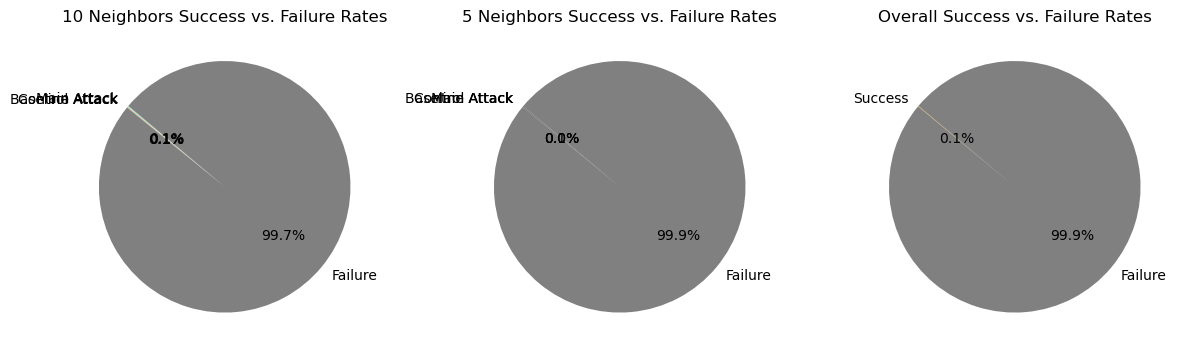

In [196]:
import matplotlib.pyplot as plt

print('Linkability Risk Assessment Success/Overall Success vs. Failure Rates via 10 and 5 Neighbors on 80% VAE Synthetic Cardiovascular Disease')

# Success rates for 10 neighbors
success_rates_10_neighbors = {
    'Main Attack': 0.001065474031123713,
    'Baseline Attack': 0.0008512470985479826,
    'Control Attack': 0.0007084291434974956,
    'Failure': 1 - (0.001065474031123713 + 0.0008512470985479826 + 0.0007084291434974956)
}

# Success rates for 5 neighbors
success_rates_5_neighbors = {
    'Main Attack': 0.0004942022109217651,
    'Baseline Attack': 0.0005656111884470086,
    'Control Attack': 0.00035138425587127805,
    'Failure': 1 - (0.0004942022109217651 + 0.0005656111884470086 + 0.00035138425587127805)
}

# Overall success vs. failure rates
overall_success_rates = {
    'Success': sum([0.001065474031123713, 0.0008512470985479826, 0.0007084291434974956,
                    0.0004942022109217651, 0.0005656111884470086, 0.00035138425587127805]),
    'Failure': 6 - sum([0.001065474031123713, 0.0008512470985479826, 0.0007084291434974956,
                        0.0004942022109217651, 0.0005656111884470086, 0.00035138425587127805])
}

# Colors for pie charts
colors_10 = ['lightblue', 'lightgreen', 'salmon', 'grey']
colors_5 = ['blue', 'green', 'red', 'grey']
colors_overall = ['orange', 'grey']

# Plotting all three pie charts side-by-side
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Pie chart for 10 neighbors
axs[0].pie(success_rates_10_neighbors.values(), labels=success_rates_10_neighbors.keys(), colors=colors_10, autopct='%1.1f%%', startangle=140)
axs[0].set_title('10 Neighbors Success vs. Failure Rates')

# Pie chart for 5 neighbors
axs[1].pie(success_rates_5_neighbors.values(), labels=success_rates_5_neighbors.keys(), colors=colors_5, autopct='%1.1f%%', startangle=140)
axs[1].set_title('5 Neighbors Success vs. Failure Rates')

# Pie chart for overall success vs. failure
axs[2].pie(overall_success_rates.values(), labels=overall_success_rates.keys(), colors=colors_overall, autopct='%1.1f%%', startangle=140)
axs[2].set_title('Overall Success vs. Failure Rates')

plt.tight_layout()
plt.show()


# STEP 5: PRIVACY RISK ASSESSMENT VIA INFERENCE PER-COLUMN ON 80% VAE-SYNTHETIC CARDIO DISEASE DATASET

C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.2769897631886646, baseline = 0.5039989027414137. Analysis results cannot be trusted.
  self._sanity_check()
C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.0001371573232955476, baseline = 0.0001371573232955476. Analysis results cannot be trusted.
  self._sanity_check()
C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.0001371573232955476, baseline = 0.0001371573232955476. Analysis results cannot be trusted.
  self._sanity_check()
C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.00013715

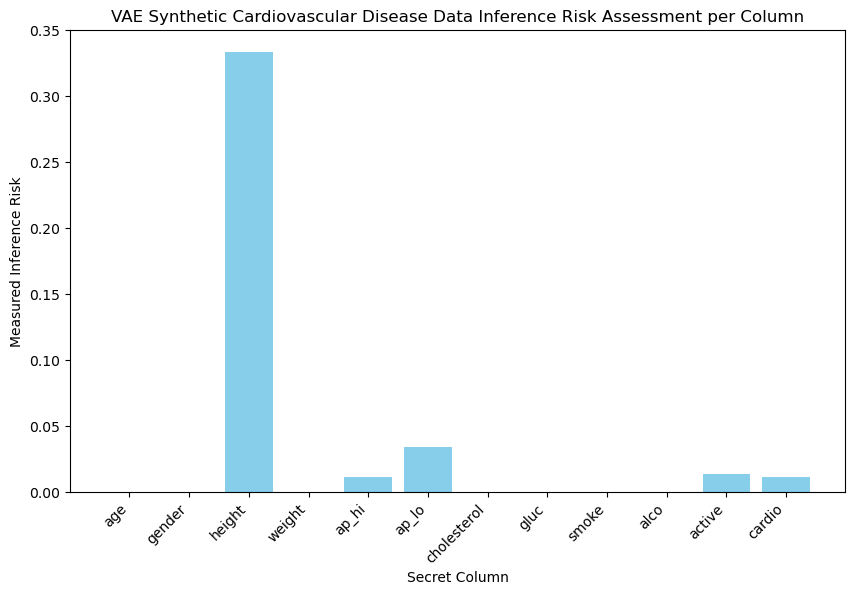

In [197]:
# Dynamically setting n_attacks based on the smallest dataset size
min_dataset_size = min(len(cardiovascular_train_dataframe), len(vae_synthetic_cardio_data_labels_df_newest), len(control_cardio_dataframe))
n_attacks_attempted = min_dataset_size  # Or some fraction of the smallest size, if desired 


columns = cardiovascular_train_dataframe.columns
inference_results = []

for secret in columns:
    aux_cols = [col for col in columns if col != secret]
    
    evaluator_inferensing = InferenceEvaluator(ori=cardiovascular_train_dataframe, 
                                   syn=vae_synthetic_cardio_data_labels_df_newest, 
                                   control=control_cardio_dataframe,
                                   aux_cols=aux_cols,
                                   secret=secret,
                                   n_attacks=n_attacks_attempted) # Use the dynamically set value
    evaluator_inferensing.evaluate(n_jobs=-1)  # Adjust 'n_jobs' as needed
    inference_results.append((secret,  evaluator_inferensing.risk()))

# Plotting the inference risks
import matplotlib.pyplot as plt

risks = [res[1].value for res in inference_results]
columns = [res[0] for res in inference_results]

plt.figure(figsize=(10, 6))
plt.bar(columns, risks, color='skyblue')
plt.xlabel('Secret Column')
plt.ylabel('Measured Inference Risk')
plt.xticks(rotation=45, ha='right')
plt.title('VAE Synthetic Cardiovascular Disease Data Inference Risk Assessment per Column')
plt.show()

In [198]:
print('Inference Risk Assessment on VAE Synthetic Cardiovascular Data when n_attempted_attacks = smallest dataset size used:', inference_results)

Inference Risk Assessment on VAE Synthetic Cardiovascular Data when n_attempted_attacks = smallest dataset size used: [('age', PrivacyRisk(value=0.0, ci=(0.0, 0.017709492870449015))), ('gender', PrivacyRisk(value=0.0, ci=(0.0, 0.015049479171211123))), ('height', PrivacyRisk(value=0.33357817535792833, ci=(0.13650091986458449, 0.5306554308512722))), ('weight', PrivacyRisk(value=0.0, ci=(0.0, 0.018218703094100085))), ('ap_hi', PrivacyRisk(value=0.01152015163616258, ci=(0.0, 0.02570054237369145))), ('ap_lo', PrivacyRisk(value=0.03425456589777431, ci=(0.0, 0.1089386986884259))), ('cholesterol', PrivacyRisk(value=0.0, ci=(0.0, 0.00019399635480410872))), ('gluc', PrivacyRisk(value=0.0, ci=(0.0, 0.00019399635480410872))), ('smoke', PrivacyRisk(value=0.0, ci=(0.0, 0.0303724004457995))), ('alco', PrivacyRisk(value=0.0, ci=(0.0, 0.00019399635480410872))), ('active', PrivacyRisk(value=0.013315214706804463, ci=(0.002894642789285891, 0.023735786624323033))), ('cardio', PrivacyRisk(value=0.0116073071

In [199]:
tellM = evaluator_inferensing.results()

print("Inference Risk When n_attacks_attempted = min_dataset_size for VAE Synthetic Cardiovascular Data:")
print("Successs rate of main attack:", tellM.attack_rate)
print("Successs rate of baseline attack:", tellM.baseline_rate)
print("Successs rate of control attack:", tellM.control_rate)

Inference Risk When n_attacks_attempted = min_dataset_size for VAE Synthetic Cardiovascular Data:
Successs rate of main attack: SuccessRate(value=0.6047569700295322, error=0.008097376146900075)
Successs rate of baseline attack: SuccessRate(value=0.5047129925166661, error=0.008280855439933114)
Successs rate of control attack: SuccessRate(value=0.6001153864903914, error=0.008113471923844963)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

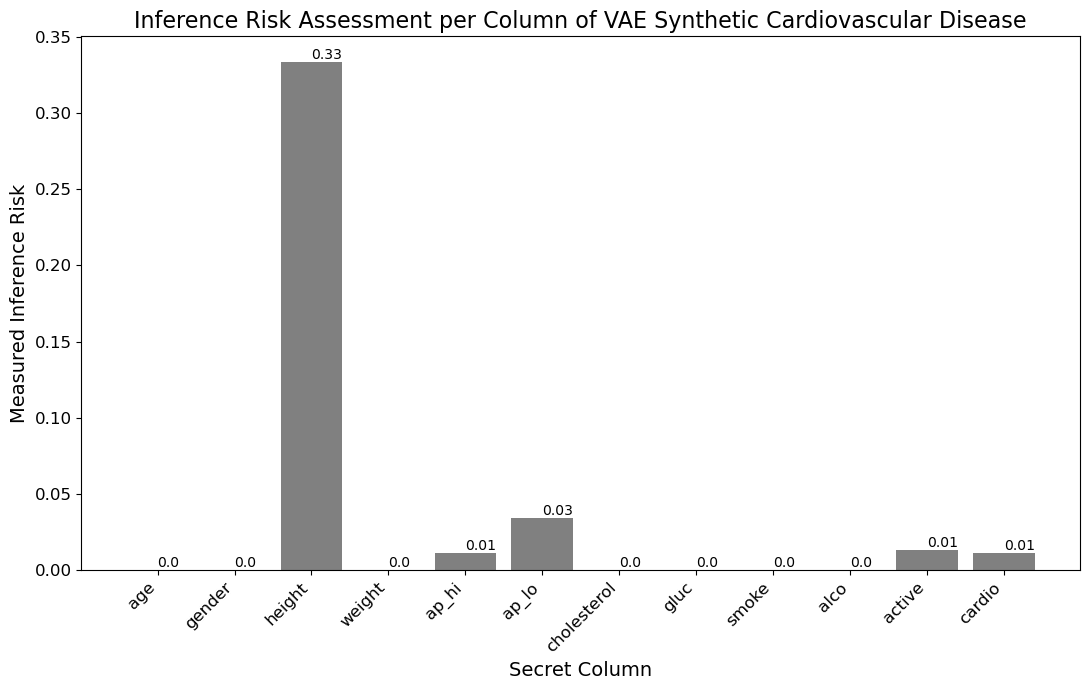

In [201]:
import matplotlib.pyplot as plt

# Extracting risk values and columns for plotting
risks = [res[1].value for res in inference_results]
columns = [res[0] for res in inference_results]

plt.figure(figsize=(11, 7))
bars = plt.bar(columns, risks, color='grey')

plt.xlabel('Secret Column', fontsize=14)
plt.ylabel('Measured Inference Risk', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Inference Risk Assessment per Column of VAE Synthetic Cardiovascular Disease', fontsize=16)

# Adding the risk value above each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval,2), va='bottom') # va: vertical alignment

plt.tight_layout()
plt.show()


Inference Risk Assessment Success vs. Failure Rates for Different Attacks on 80% VAE Synthetic Cardiovascular Disease


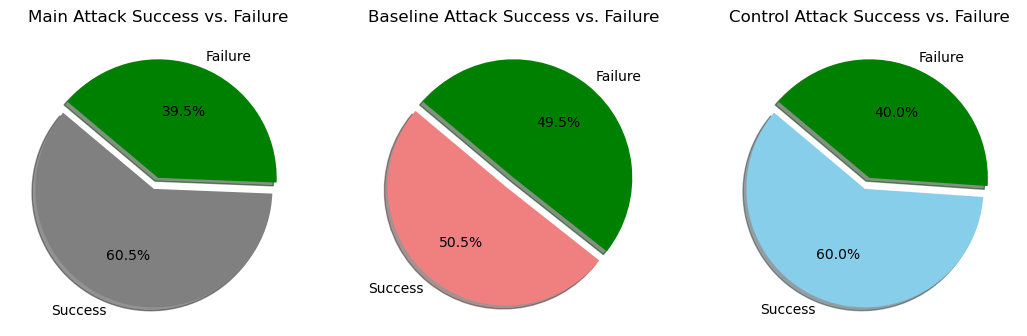

In [215]:
import matplotlib.pyplot as plt

print('Inference Risk Assessment Success vs. Failure Rates for Different Attacks on 80% VAE Synthetic Cardiovascular Disease')

# Success rates and failure for each attack based on provided data
attacks_data = {
    'Main Attack': 0.6048,
    'Baseline Attack': 0.5047,
    'Control Attack': 0.6001,
}

# Adding failure rates by calculating the complement to 1 for each
failure_rates = {key: 1 - value for key, value in attacks_data.items()}

# Colors for the pie chart
colors = ['grey', 'lightcoral', 'skyblue']

# Exploding the 1st slice (i.e. 'Overall Success')
explode = (0.1, 0) 

# Create pie charts for each type of attack
fig, axs = plt.subplots(1, 3, figsize=(13, 8))

for i, (key, value) in enumerate(attacks_data.items()):
    axs[i].pie([value, failure_rates[key]], labels=['Success', 'Failure'], explode=explode, colors=[colors[i], 'green'], autopct='%1.1f%%', shadow=True, startangle=140)
    axs[i].set_title(f'{key} Success vs. Failure')

plt.show()


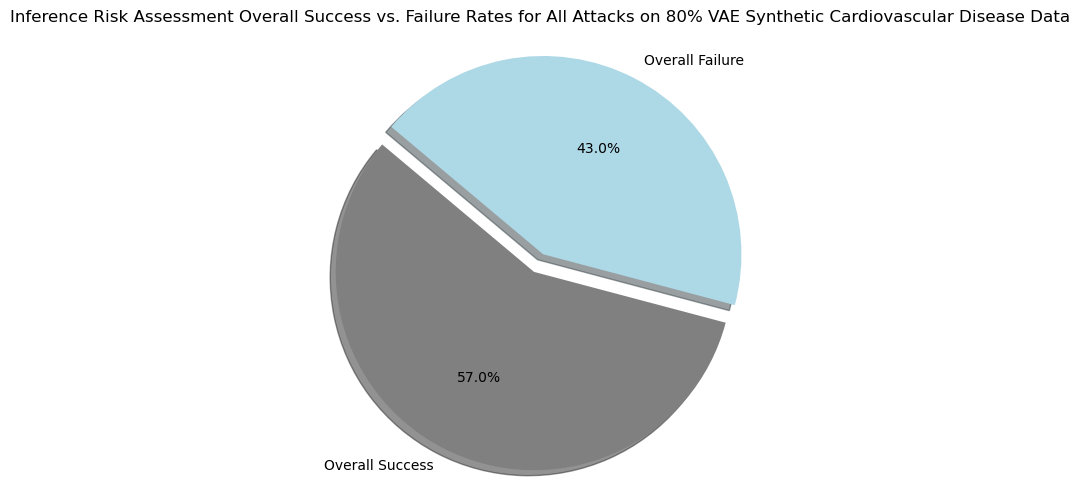

In [216]:
# Success rates for main, baseline, and control attacks
success_rate_main = 0.6047569700295322
success_rate_baseline = 0.5047129925166661
success_rate_control = 0.6001153864903914

# Calculating overall success vs. failure rates for all attack types combined
total_success = success_rate_main + success_rate_baseline + success_rate_control
total_attacks = 3  # Since each attack rate is calculated out of 1
overall_success_rate = total_success / total_attacks
overall_failure_rate = 1 - overall_success_rate

# Labels for the pie chart
labels = ['Overall Success', 'Overall Failure']

# Values for each section of the pie chart
sizes = [overall_success_rate, overall_failure_rate]

# Colors for each section
colors = ['grey', 'lightblue']

# Exploding the 1st slice (i.e. 'Overall Success')
explode = (0.1, 0)  

# Creating the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Inference Risk Assessment Overall Success vs. Failure Rates for All Attacks on 80% VAE Synthetic Cardiovascular Disease Data')
plt.show()
